In [1]:
#BIBLIOTEKE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

import time

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
#ANALIZA PODATAKA

baza = pd.read_csv('urban_sound.csv')
print("shape: \n",baza.shape)
print("\n types: \n", baza.dtypes, "\n")
baza.head(10)

shape: 
 (5435, 167)

 types: 
 class     object
mfcc0    float64
mfcc1    float64
mfcc2    float64
mfcc3    float64
          ...   
tonn1    float64
tonn2    float64
tonn3    float64
tonn4    float64
tonn5    float64
Length: 167, dtype: object 



,class,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,...,mel_s124,mel_s125,mel_s126,mel_s127,tonn0,tonn1,tonn2,tonn3,tonn4,tonn5
0,siren,-82.123589,139.505920,-42.430866,24.827860,-11.620764,23.497084,-12.194590,25.897139,-9.405277,...,0.000032,7.176624e-06,1.343801e-06,2.831151e-07,-0.003187,0.005104,-0.036059,-0.029152,-0.007110,0.025727
1,street_music,-15.744005,124.119965,-29.428881,39.447193,-23.501913,16.550816,-21.736818,16.533573,-16.971729,...,0.000413,9.196644e-05,2.487881e-05,1.074347e-05,0.017137,0.068678,-0.129723,0.006873,0.014044,0.000799
2,drilling,-123.393654,15.181949,-50.093330,7.141872,-26.817034,-0.692503,-8.223075,13.512939,-11.382056,...,0.023906,3.908841e-03,3.002299e-04,3.851427e-05,-0.002272,-0.006441,0.014953,0.049981,-0.015763,-0.010118
3,siren,-213.278809,89.323586,-55.256187,12.632097,-47.775375,14.702908,19.039341,15.974401,-0.344621,...,0.000004,2.044174e-06,1.242911e-06,1.134319e-06,-0.141602,-0.280224,-0.244525,-0.023331,0.210154,-0.120574
4,dog_bark,-237.926483,135.902451,39.268440,21.240236,9.531328,13.885118,-3.994446,12.481486,-2.604627,...,0.000188,1.491167e-04,1.411493e-05,3.938324e-06,-0.012800,0.000354,0.005635,-0.062591,0.015265,-0.009479
5,children_playing,-250.358337,128.013565,-47.575787,25.628069,-26.707920,13.660259,-4.026623,5.164236,7.805367,...,0.000013,3.544863e-06,7.658602e-07,3.027918e-07,-0.000674,0.006494,-0.014733,-0.025909,0.002346,0.006214
6,street_music,-203.975525,83.958138,-66.730278,18.536461,-20.581497,1.906206,-6.121214,15.719913,-6.935401,...,0.000033,7.049115e-06,1.102343e-06,1.799214e-07,0.062895,-0.041714,0.031199,0.076242,-0.010833,0.001651
7,drilling,-55.400555,22.767319,-46.079865,8.980095,-29.806271,22.077938,-22.545788,0.851256,-23.257723,...,0.003695,1.456806e-03,2.052479e-04,2.184006e-05,-0.092127,0.174117,-0.229968,-0.026472,-0.092986,-0.014835
8,gun_shot,-110.229149,91.258995,-137.438950,57.104736,-42.575893,18.365829,-31.951092,8.053198,-16.543413,...,0.000003,2.810952e-06,1.370247e-06,1.808070e-07,-0.000499,-0.004441,0.005313,0.012034,-0.006865,0.000190
9,dog_bark,-337.760040,140.775192,-15.511056,17.615110,8.220655,14.850394,-12.830464,17.522957,-12.018428,...,0.000003,7.304376e-07,1.520486e-07,3.791392e-08,0.009866,-0.012454,-0.033455,0.046231,0.001217,-0.004886


In [3]:
baza.tail(20)

,class,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,...,mel_s124,mel_s125,mel_s126,mel_s127,tonn0,tonn1,tonn2,tonn3,tonn4,tonn5
5415,gun_shot,-286.035400,109.760223,-13.534907,1.990462,-14.129452,-0.850123,-5.516676,9.709019,-4.180152,...,1.853254e-03,8.579410e-04,1.047855e-04,8.964544e-06,-0.011194,0.023034,0.067062,0.005412,0.004985,-0.001273
5416,dog_bark,-271.750153,174.261108,-40.390053,17.516174,8.350994,22.335724,-1.524599,6.992123,-3.894243,...,4.155926e-07,1.198927e-07,4.575017e-08,3.230487e-08,-0.035387,-0.021409,-0.028761,0.078475,0.041682,-0.007325
5417,street_music,-292.853882,148.155609,5.666834,22.742739,2.753736,15.051447,-12.085079,18.736874,-2.398348,...,7.927602e-06,1.815225e-06,2.850319e-07,1.392933e-07,-0.024042,0.091739,0.020461,0.156814,-0.024989,0.004984
5418,dog_bark,-183.569977,137.743469,-41.609589,23.318163,-6.585221,27.334763,9.076976,21.011026,10.576599,...,4.999581e-06,3.165265e-06,1.703310e-06,1.435496e-06,-0.012792,0.023728,-0.020630,0.019871,0.006946,0.016405
5419,jackhammer,-142.794983,124.184250,5.729889,24.735205,-12.246232,17.531445,-11.871825,21.586531,-15.177445,...,2.130764e-04,3.601076e-05,7.876452e-06,5.475987e-06,-0.064551,-0.056866,-0.101386,0.017442,0.028712,-0.029541
5420,dog_bark,-305.794800,123.601494,9.970127,43.499615,7.797102,28.460291,5.848723,18.961166,7.931417,...,1.360684e-06,5.040147e-07,3.190311e-07,2.844338e-07,-0.001521,-0.010537,-0.031037,-0.028814,0.015116,0.012825
5421,engine_idling,-279.041962,85.710533,-48.029026,20.717213,-22.086969,38.695488,-12.540759,30.912334,-16.667868,...,1.427168e-06,4.438002e-07,9.340149e-08,8.804482e-09,-0.025822,0.095742,-0.041506,0.064192,-0.027925,-0.008390
5422,siren,-218.402359,161.662903,-47.544651,10.707149,-13.483907,16.491917,2.397862,20.820583,-6.605827,...,2.092790e-06,1.468523e-06,1.306509e-06,1.281449e-06,-0.015289,-0.038915,-0.063546,0.051898,0.017497,0.010381
5423,children_playing,-399.975555,78.929695,20.249680,44.505074,8.171991,-1.700050,-4.912724,8.609478,-4.980195,...,8.434938e-05,2.091323e-05,3.032006e-06,2.340211e-07,0.014874,0.003641,-0.059494,-0.029508,0.011362,-0.015849
5424,jackhammer,-151.891434,187.320587,-43.657898,32.783077,-42.446018,13.944089,-1.483136,8.631572,-17.086134,...,8.480203e-06,8.061887e-06,7.812834e-06,7.607602e-06,-0.000322,-0.013415,-0.005058,0.030339,0.015708,0.000393


In [4]:
NaN_ = baza.isnull().sum()
print(NaN_)
procenat = baza.isnull().sum()/len(baza)*100
print("\n Procenat NaN podataka: \n",procenat)
print('\n')
print(baza.info())

class    0
mfcc0    0
mfcc1    0
mfcc2    0
mfcc3    0
        ..
tonn1    0
tonn2    0
tonn3    0
tonn4    0
tonn5    0
Length: 167, dtype: int64

 Procenat NaN podataka: 
 class    0.0
mfcc0    0.0
mfcc1    0.0
mfcc2    0.0
mfcc3    0.0
        ... 
tonn1    0.0
tonn2    0.0
tonn3    0.0
tonn4    0.0
tonn5    0.0
Length: 167, dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5435 entries, 0 to 5434
Columns: 167 entries, class to tonn5
dtypes: float64(166), object(1)
memory usage: 6.9+ MB
None


In [5]:
print(baza.describe())
unikati = pd.unique(baza['class'])
print(unikati)

#baza.groupby(by=y).describe()

             mfcc0        mfcc1        mfcc2        mfcc3        mfcc4  \
count  5435.000000  5435.000000  5435.000000  5435.000000  5435.000000   
mean   -230.594786   117.002976   -29.107316    21.059276   -13.206914   
std     128.543631    48.285532    31.748864    22.032585    15.951739   
min    -765.879761   -55.461746  -165.823181   -62.845173  -100.633797   
25%    -313.380249    88.710949   -47.118084     9.866420   -23.499930   
50%    -216.086792   122.770348   -26.312748    22.838654   -13.179688   
75%    -131.663040   149.515541    -8.971909    35.475960    -2.059110   
max     131.924393   270.124237    64.994560   114.069862    44.862610   

             mfcc5        mfcc6        mfcc7        mfcc8        mfcc9  ...  \
count  5435.000000  5435.000000  5435.000000  5435.000000  5435.000000  ...   
mean     14.435149    -7.827222    11.639220    -9.877271     9.248917  ...   
std      14.469189    13.154916    10.981661    10.255673     8.594918  ...   
min     -57.73038

In [6]:
baza_klasa = baza.set_index('class')
print("shape: \n",baza_klasa.shape)
baza_klasa.head(20)

shape: 
 (5435, 166)


,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mel_s124,mel_s125,mel_s126,mel_s127,tonn0,tonn1,tonn2,tonn3,tonn4,tonn5
class,,,,,,,,,,,,,,,,,,,,,
siren,-82.123589,139.505920,-42.430866,24.827860,-11.620764,23.497084,-12.194590,25.897139,-9.405277,21.210428,...,3.162653e-05,7.176624e-06,1.343801e-06,2.831151e-07,-0.003187,0.005104,-0.036059,-0.029152,-0.007110,0.025727
street_music,-15.744005,124.119965,-29.428881,39.447193,-23.501913,16.550816,-21.736818,16.533573,-16.971729,4.483583,...,4.133352e-04,9.196644e-05,2.487881e-05,1.074347e-05,0.017137,0.068678,-0.129723,0.006873,0.014044,0.000799
drilling,-123.393654,15.181949,-50.093330,7.141872,-26.817034,-0.692503,-8.223075,13.512939,-11.382056,19.949352,...,2.390601e-02,3.908841e-03,3.002299e-04,3.851427e-05,-0.002272,-0.006441,0.014953,0.049981,-0.015763,-0.010118
siren,-213.278809,89.323586,-55.256187,12.632097,-47.775375,14.702908,19.039341,15.974401,-0.344621,-3.852786,...,3.852206e-06,2.044174e-06,1.242911e-06,1.134319e-06,-0.141602,-0.280224,-0.244525,-0.023331,0.210154,-0.120574
dog_bark,-237.926483,135.902451,39.268440,21.240236,9.531328,13.885118,-3.994446,12.481486,-2.604627,6.070915,...,1.878213e-04,1.491167e-04,1.411493e-05,3.938324e-06,-0.012800,0.000354,0.005635,-0.062591,0.015265,-0.009479
children_playing,-250.358337,128.013565,-47.575787,25.628069,-26.707920,13.660259,-4.026623,5.164236,7.805367,10.534707,...,1.267657e-05,3.544863e-06,7.658602e-07,3.027918e-07,-0.000674,0.006494,-0.014733,-0.025909,0.002346,0.006214
street_music,-203.975525,83.958138,-66.730278,18.536461,-20.581497,1.906206,-6.121214,15.719913,-6.935401,11.426916,...,3.328066e-05,7.049115e-06,1.102343e-06,1.799214e-07,0.062895,-0.041714,0.031199,0.076242,-0.010833,0.001651
drilling,-55.400555,22.767319,-46.079865,8.980095,-29.806271,22.077938,-22.545788,0.851256,-23.257723,-1.964685,...,3.694544e-03,1.456806e-03,2.052479e-04,2.184006e-05,-0.092127,0.174117,-0.229968,-0.026472,-0.092986,-0.014835
gun_shot,-110.229149,91.258995,-137.438950,57.104736,-42.575893,18.365829,-31.951092,8.053198,-16.543413,-3.269818,...,3.040960e-06,2.810952e-06,1.370247e-06,1.808070e-07,-0.000499,-0.004441,0.005313,0.012034,-0.006865,0.000190


In [7]:
baza_klasa_sirene = baza_klasa.loc['siren']
print("shape: \n",baza_klasa_sirene.shape)
#baza_klasa_sirene.head()

shape: 
 (607, 166)


In [8]:
baza_klasa_ulicna_muzika = baza_klasa.loc['street_music']
print("shape: \n",baza_klasa_ulicna_muzika.shape)
#baza_klasa_ulicna_muzika.head()

shape: 
 (600, 166)


In [9]:
baza_klasa_busenje = baza_klasa.loc['drilling']
print("shape: \n",baza_klasa_busenje.shape)
#baza_klasa_busenje.head()

shape: 
 (600, 166)


In [10]:
baza_klasa_lavez_pasa = baza_klasa.loc['dog_bark']
print("shape: \n",baza_klasa_lavez_pasa.shape)
#baza_klasa_lavez_pasa.head()

shape: 
 (600, 166)


In [11]:
baza_klasa_igranje_dece = baza_klasa.loc['children_playing']
print("shape: \n",baza_klasa_igranje_dece.shape)
#baza_klasa_igranje_dece.head()

shape: 
 (600, 166)


In [12]:
baza_klasa_pucanj = baza_klasa.loc['gun_shot']
print("shape: \n",baza_klasa_pucanj.shape)
#baza_klasa_pucanj.head()

shape: 
 (230, 166)


In [13]:
baza_klasa_rad_motora = baza_klasa.loc['engine_idling']
print("shape: \n",baza_klasa_rad_motora.shape)
#baza_klasa_rad_motora.head()

shape: 
 (624, 166)


In [14]:
baza_klasa_klima_uredjaj = baza_klasa.loc['air_conditioner']
print("shape: \n",baza_klasa_klima_uredjaj.shape)
#baza_klasa_klima_uredjaj.head()

shape: 
 (600, 166)


In [15]:
baza_klasa_cekic = baza_klasa.loc['jackhammer']
print("shape: \n",baza_klasa_cekic.shape)
#baza_klasa_cekic.head()

shape: 
 (668, 166)


In [16]:
baza_klasa_sirena_automobila = baza_klasa.loc['car_horn']
print("shape: \n",baza_klasa_sirena_automobila.shape)
#baza_klasa_sirena_automobila.head()

shape: 
 (306, 166)


(-1.105697808677873,
 1.107123748401572,
 -1.3376893489562696,
 1.4207007551400626)

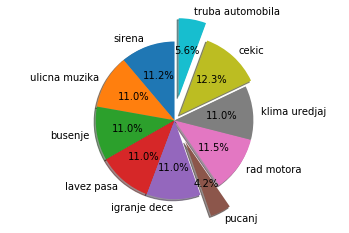

In [17]:
label1 = 'sirena', 'ulicna muzika', 'busenje', 'lavez pasa', 'igranje dece', 'pucanj', 'rad motora', 'klima uredjaj', 'cekic', 'truba automobila'

ukupno = 5435
sirene_p = 607/ukupno
ulicna_muzika_p = 600/ukupno
sirene_busenje_p = 600/ukupno
sirene_lavez_pasa_p = 600/ukupno
sirene_igranje_dece_p = 600/ukupno
sirene_pucanj_p = 230/ukupno
sirene_rad_motora_p = 624/ukupno
sirene_klima_uredjaj_p = 600/ukupno
sirene_cekic_p = 668/ukupno
sirene_sirena_automobila_p = 306/ukupno


sizes = [sirene_p, ulicna_muzika_p, sirene_busenje_p, sirene_lavez_pasa_p, sirene_igranje_dece_p,
         sirene_pucanj_p, sirene_rad_motora_p, sirene_klima_uredjaj_p, sirene_cekic_p, sirene_sirena_automobila_p]

#naznaciti pucanj i sirenu kao klase koje odstupaju od prosecnog udela klase
explode = (0, 0, 0, 0, 0, 0.3, 0, 0, 0.1, 0.3) 

plt.subplots()
plt.pie(sizes, explode=explode, labels=label1, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  

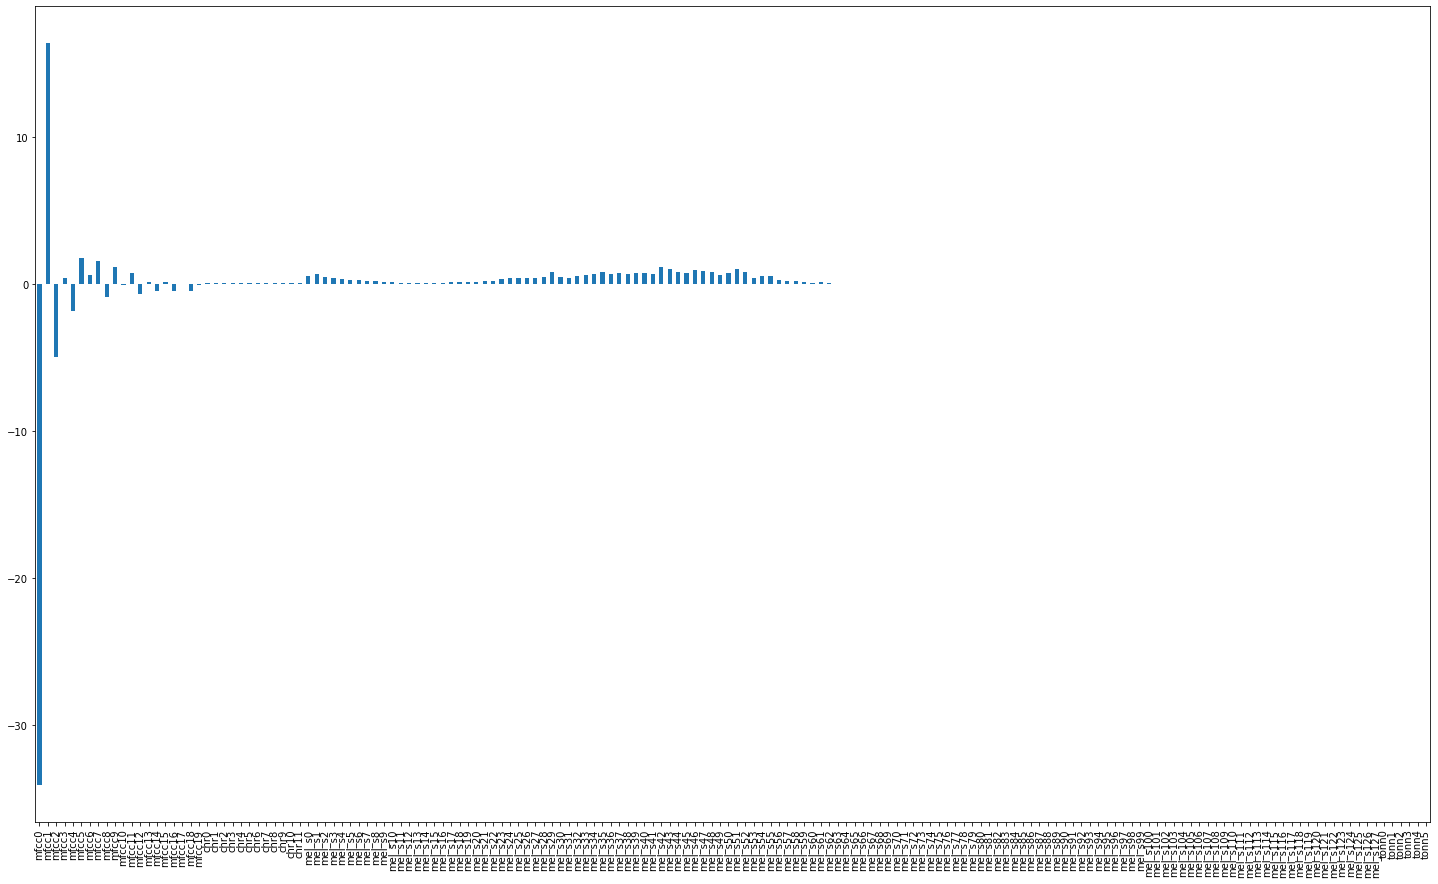

In [18]:
baza_klasa_sirene = baza.loc[baza['class'] == 'siren']
baza_zvuci = baza_klasa_sirene.drop(['class'],axis = 1)
baza_procenti = round(baza_zvuci.sum()/len(baza),10)
plt.figure(figsize = (25,15))
baza_procenti.plot(kind = 'bar')

Text(0, 0.5, 'Verovatnoća')

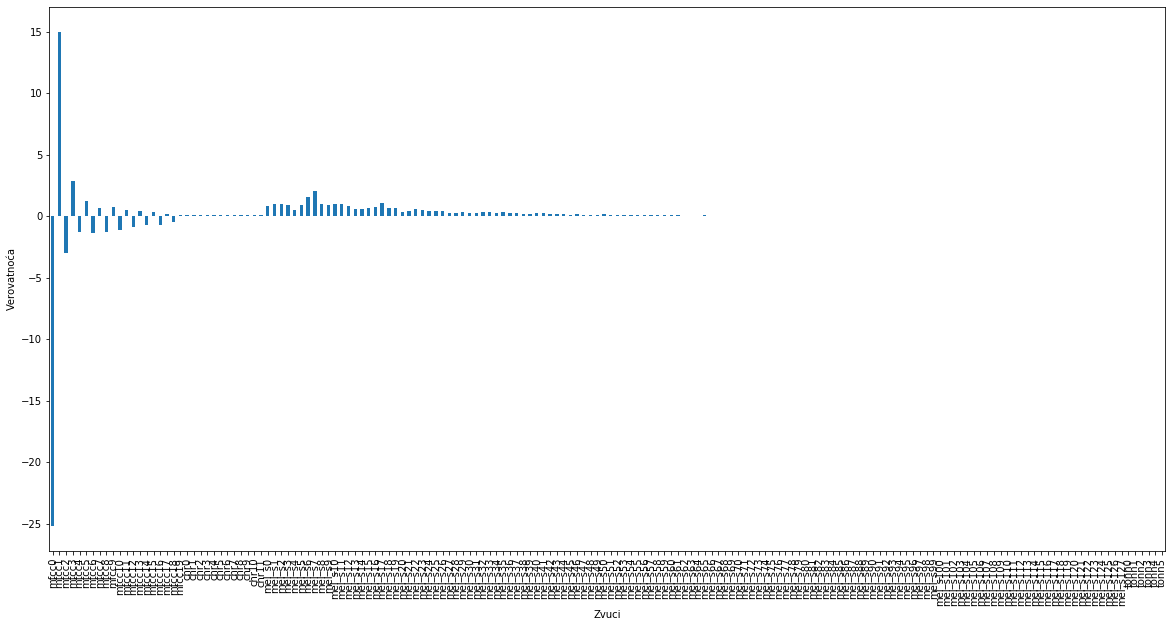

In [19]:
baza_klasa_ulicna_muzika = baza.loc[baza['class'] == 'street_music']
baza_zvuci = baza_klasa_ulicna_muzika.drop(['class'],axis = 1)
baza_procenti = round(baza_zvuci.sum()/len(baza),10)
plt.figure(figsize = (20,10))
baza_procenti.plot(kind = 'bar')
plt.xlabel('Zvuci')
plt.ylabel('Verovatnoća')

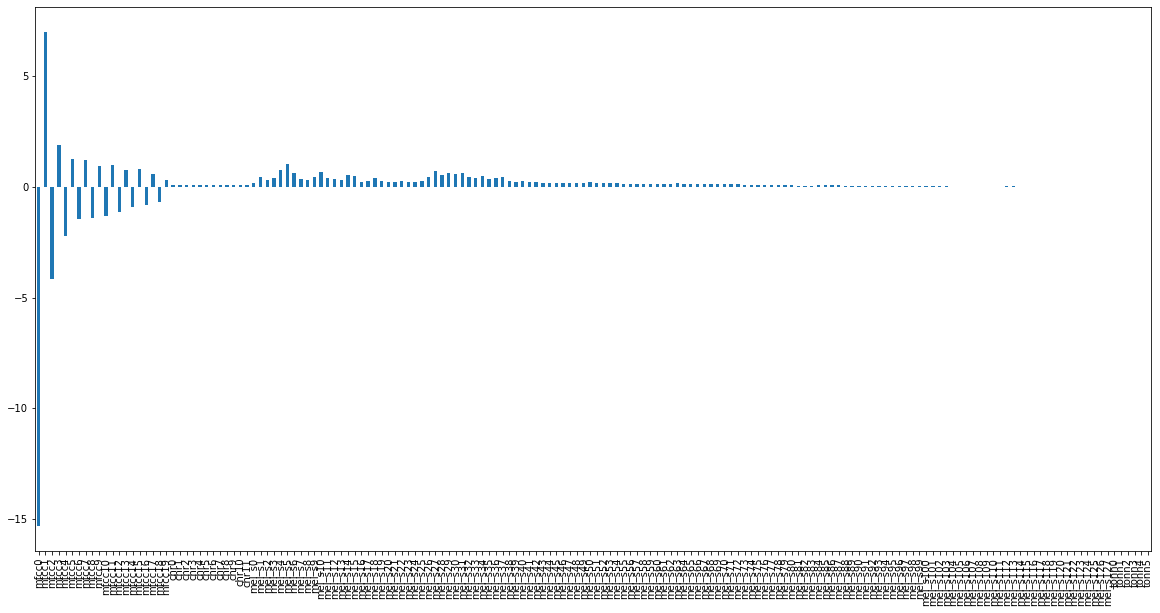

In [20]:
baza_klasa_busenje = baza.loc[baza['class'] == 'drilling']
baza_zvuci = baza_klasa_busenje.drop(['class'],axis = 1)
baza_procenti = round(baza_zvuci.sum()/len(baza),10)
plt.figure(figsize = (20,10))
baza_procenti.plot(kind = 'bar')

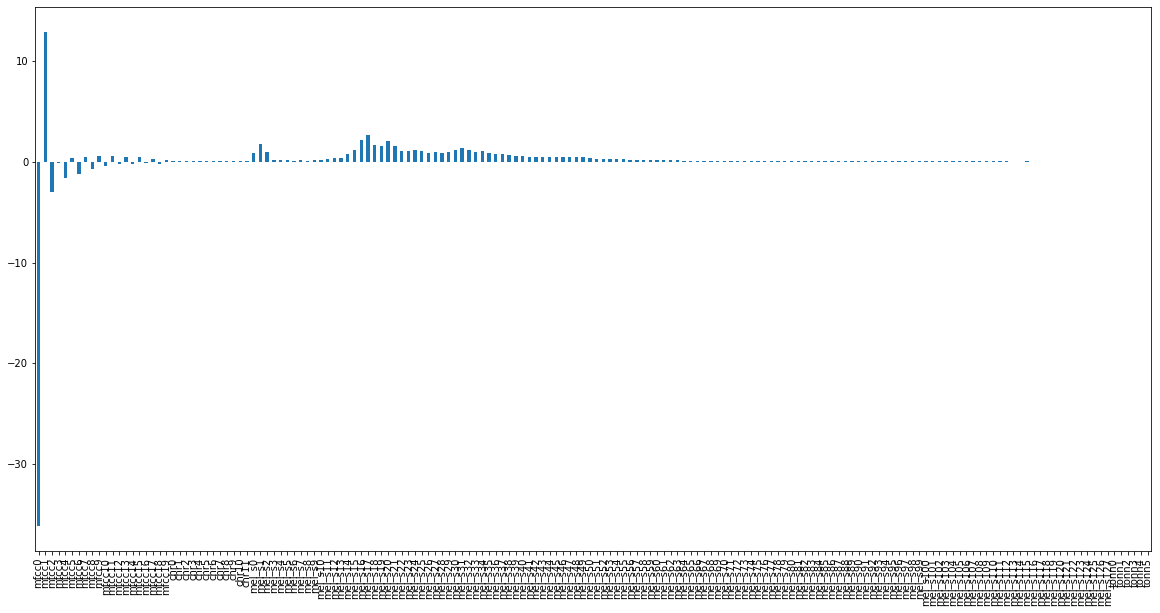

In [21]:
baza_klasa_lavez_pasa = baza.loc[baza['class'] == 'dog_bark']
baza_zvuci = baza_klasa_lavez_pasa.drop(['class'],axis = 1)
baza_procenti = round(baza_zvuci.sum()/len(baza),10)
plt.figure(figsize = (20,10))
baza_procenti.plot(kind = 'bar')

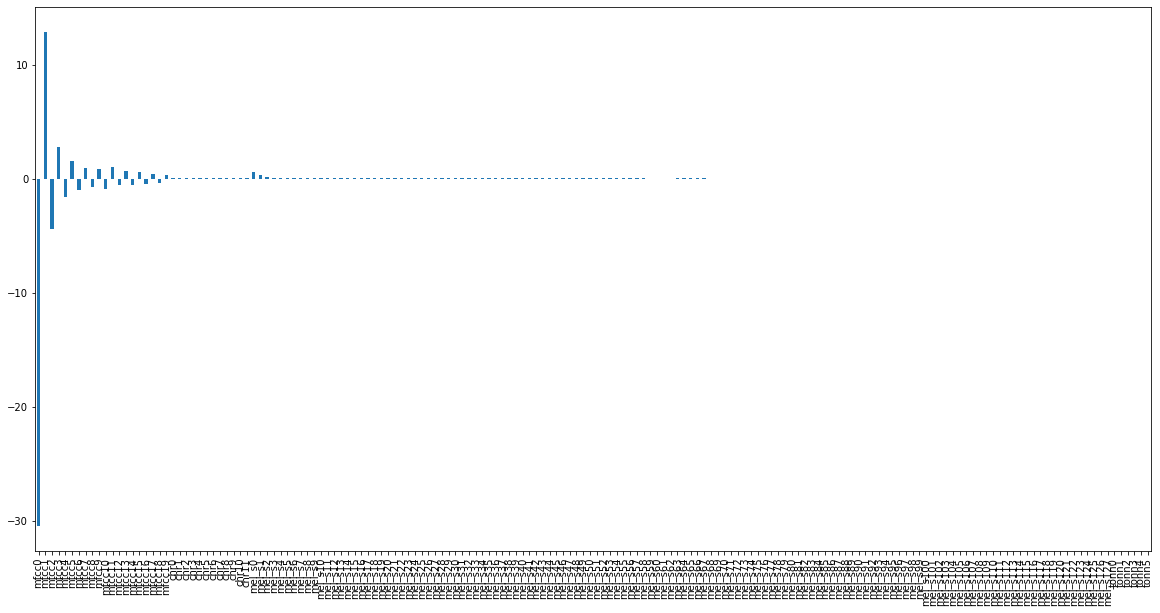

In [22]:
baza_klasa_igranje_dece = baza.loc[baza['class'] == 'children_playing']
baza_zvuci = baza_klasa_igranje_dece.drop(['class'],axis = 1)
baza_procenti = round(baza_zvuci.sum()/len(baza),10)
plt.figure(figsize = (20,10))
baza_procenti.plot(kind = 'bar')

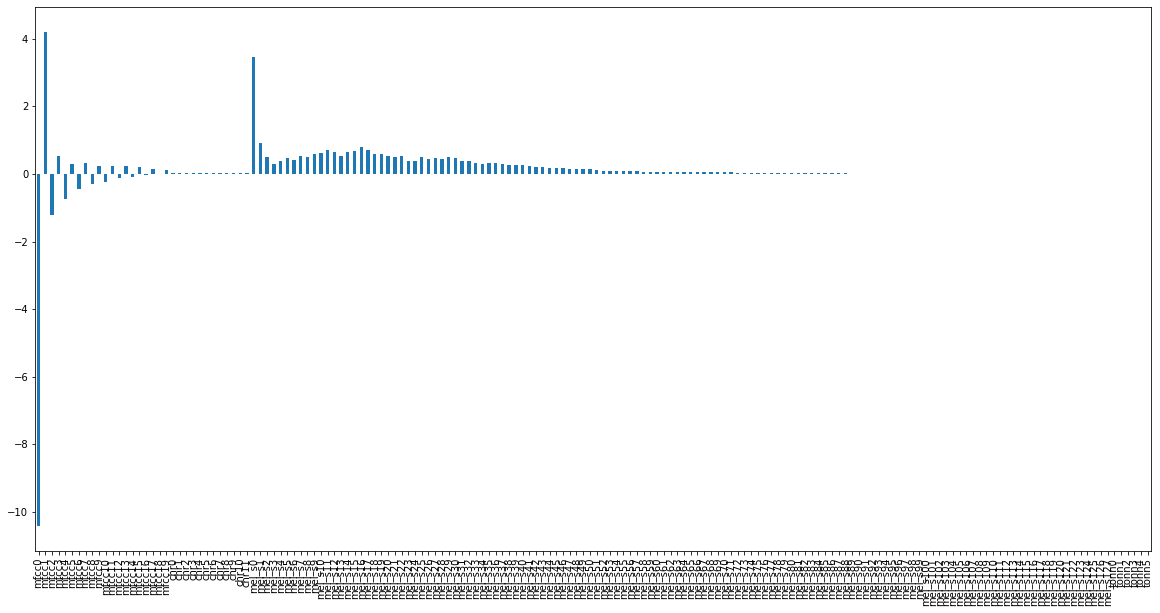

In [23]:
baza_klasa_pucanj = baza.loc[baza['class'] == 'gun_shot']
baza_zvuci = baza_klasa_pucanj.drop(['class'],axis = 1)
baza_procenti = round(baza_zvuci.sum()/len(baza),10)
plt.figure(figsize = (20,10))
baza_procenti.plot(kind = 'bar')

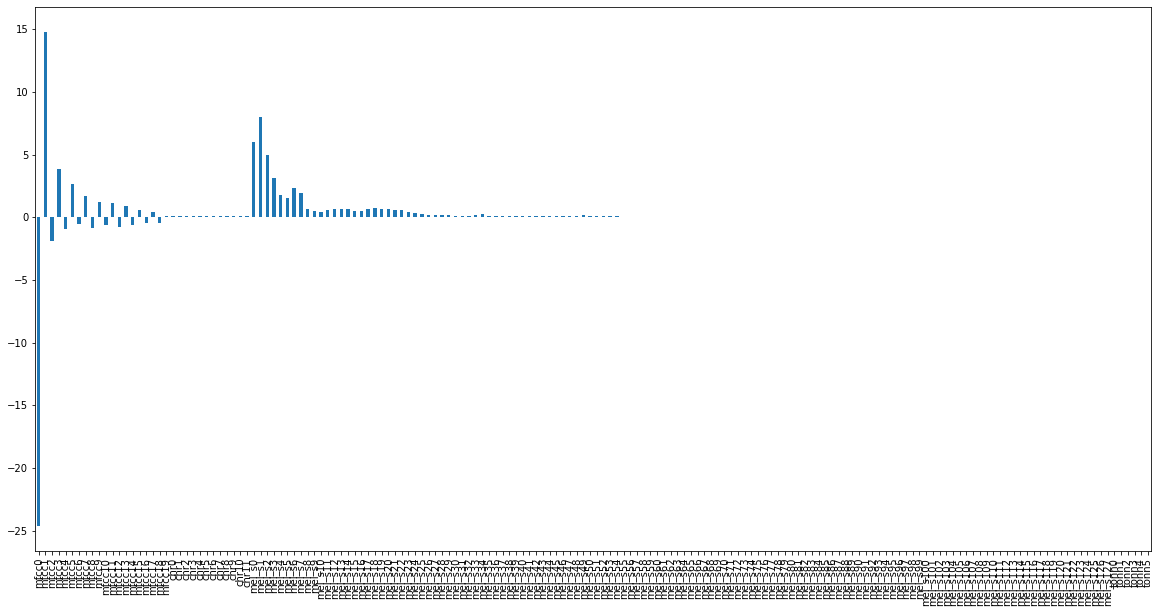

In [24]:
baza_klasa_rad_motora = baza.loc[baza['class'] == 'engine_idling']
baza_zvuci = baza_klasa_rad_motora.drop(['class'],axis = 1)
baza_procenti = round(baza_zvuci.sum()/len(baza),10)
plt.figure(figsize = (20,10))
baza_procenti.plot(kind = 'bar')

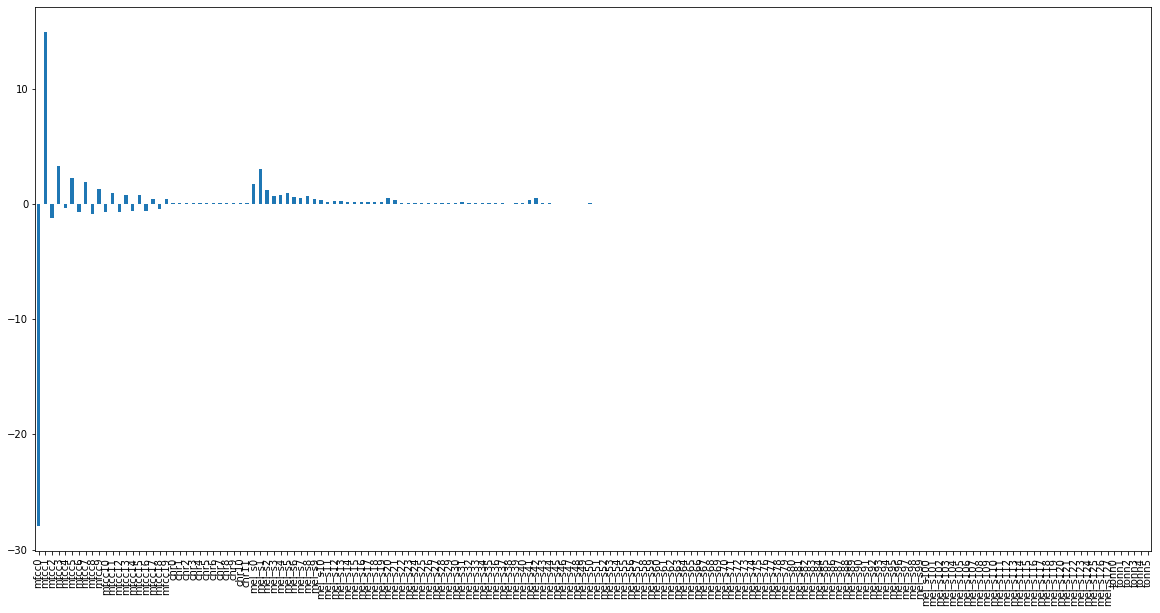

In [25]:
baza_klasa_klima_uredjaj = baza.loc[baza['class'] == 'air_conditioner']
baza_zvuci = baza_klasa_klima_uredjaj.drop(['class'],axis = 1)
baza_procenti = round(baza_zvuci.sum()/len(baza),10)
plt.figure(figsize = (20,10))
baza_procenti.plot(kind = 'bar')

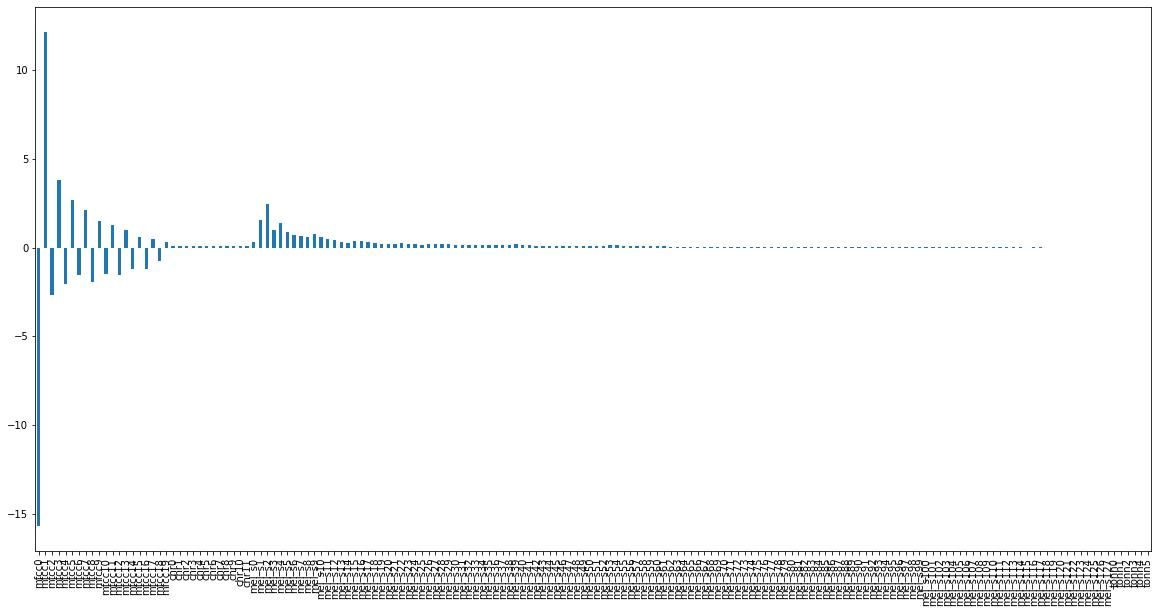

In [26]:
baza_klasa_cekic = baza.loc[baza['class'] == 'jackhammer']
baza_zvuci = baza_klasa_cekic.drop(['class'],axis = 1)
baza_procenti = round(baza_zvuci.sum()/len(baza),10)
plt.figure(figsize = (20,10))
baza_procenti.plot(kind = 'bar')

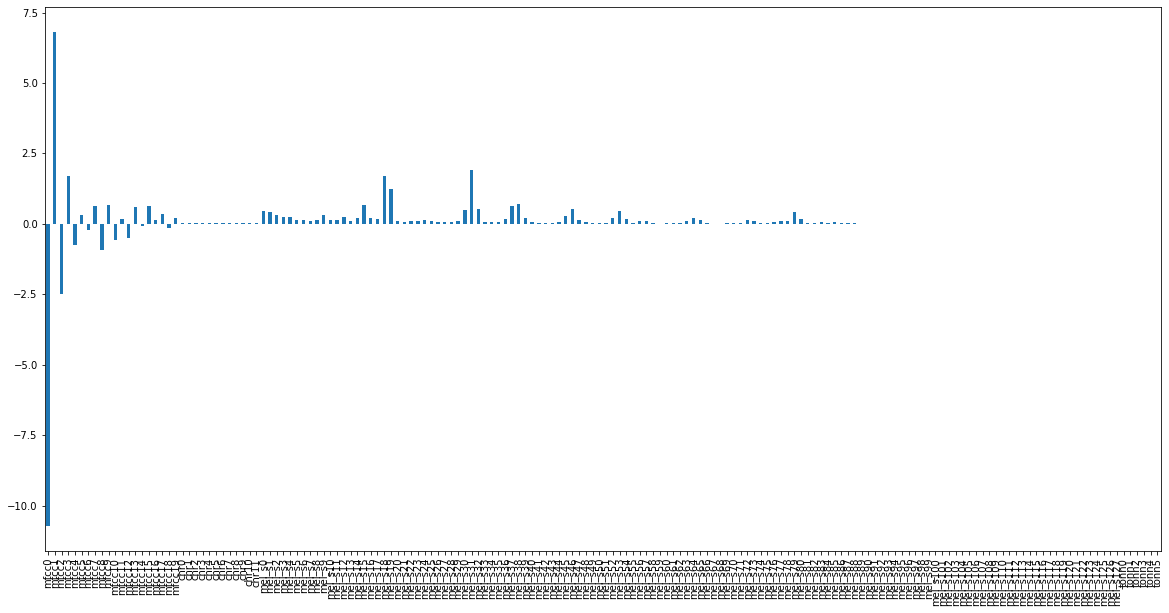

In [27]:
baza_klasa_sirena_automobila = baza.loc[baza['class'] == 'car_horn']
baza_zvuci = baza_klasa_sirena_automobila.drop(['class'],axis = 1)
baza_procenti = round(baza_zvuci.sum()/len(baza),10)
plt.figure(figsize = (20,10))
baza_procenti.plot(kind = 'bar')

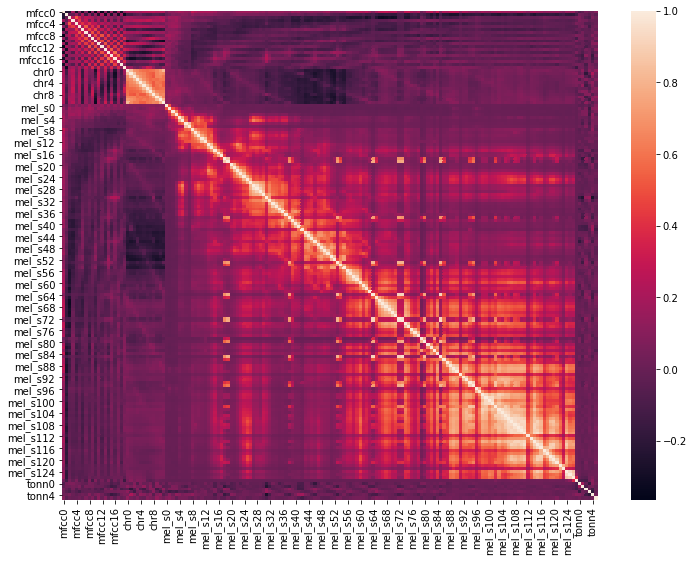

In [28]:
import seaborn as sns

korelacija = baza.corr()
figura = plt.figure(figsize=(12,9))
sns.heatmap(korelacija);

Koeficijent asimetrije iznosi -0.30
Koeficijent spljostenosti iznosi 1.07


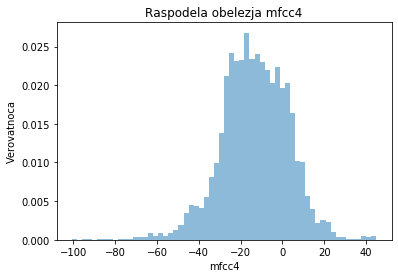

In [29]:
mfcc4 = baza['mfcc4']
plt.hist(mfcc4, bins = 60, alpha=0.5, density=True)
plt.title('Raspodela obelezja mfcc4')
plt.ylabel('Verovatnoca')
plt.xlabel('mfcc4')

print('Koeficijent asimetrije iznosi %.2f' % skew(mfcc4))
print('Koeficijent spljostenosti iznosi %.2f' % kurtosis(mfcc4))

Koeficijent asimetrije iznosi -0.68
Koeficijent spljostenosti iznosi 0.63


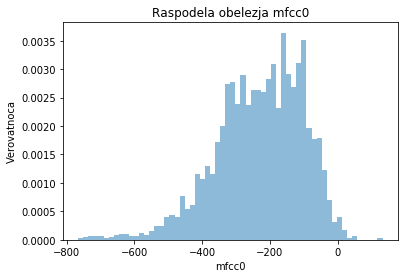

In [30]:
mfcc0 = baza['mfcc0']
plt.hist(mfcc0, bins = 60, alpha=0.5, density=True)
plt.title('Raspodela obelezja mfcc0')
plt.ylabel('Verovatnoca')
plt.xlabel('mfcc0')

print('Koeficijent asimetrije iznosi %.2f' % skew(mfcc0))
print('Koeficijent spljostenosti iznosi %.2f' % kurtosis(mfcc0))

Koeficijent asimetrije iznosi -0.21
Koeficijent spljostenosti iznosi 0.21


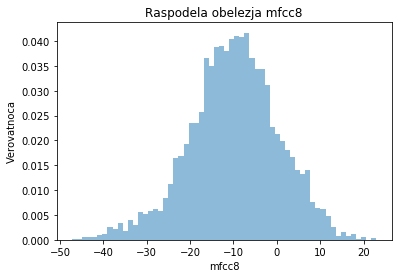

In [31]:
mfcc8 = baza['mfcc8']
plt.hist(mfcc8, bins = 60, alpha=0.5, density=True)
plt.title('Raspodela obelezja mfcc8')
plt.ylabel('Verovatnoca')
plt.xlabel('mfcc8')

print('Koeficijent asimetrije iznosi %.2f' % skew(mfcc8))
print('Koeficijent spljostenosti iznosi %.2f' % kurtosis(mfcc8))

Koeficijent asimetrije iznosi 0.30
Koeficijent spljostenosti iznosi 0.53


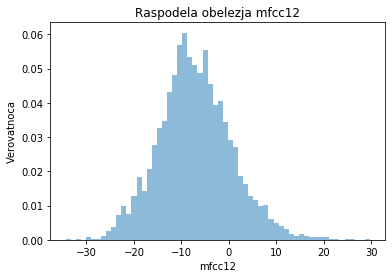

In [32]:
mfcc12 = baza['mfcc12']
plt.hist(mfcc12, bins = 60, alpha=0.5, density=True)
plt.title('Raspodela obelezja mfcc12')
plt.ylabel('Verovatnoca')
plt.xlabel('mfcc12')

print('Koeficijent asimetrije iznosi %.2f' % skew(mfcc12))
print('Koeficijent spljostenosti iznosi %.2f' % kurtosis(mfcc12))

Koeficijent asimetrije iznosi 0.68
Koeficijent spljostenosti iznosi 2.56


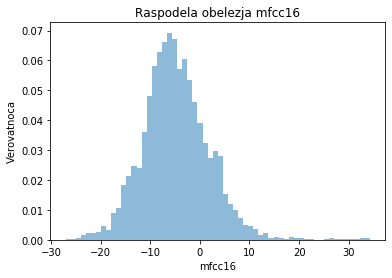

In [33]:
mfcc16 = baza['mfcc16']
plt.hist(mfcc16, bins = 60, alpha=0.5, density=True)
plt.title('Raspodela obelezja mfcc16')
plt.ylabel('Verovatnoca')
plt.xlabel('mfcc16')

print('Koeficijent asimetrije iznosi %.2f' % skew(mfcc16))
print('Koeficijent spljostenosti iznosi %.2f' % kurtosis(mfcc16))

Koeficijent asimetrije iznosi 0.35
Koeficijent spljostenosti iznosi 6.10


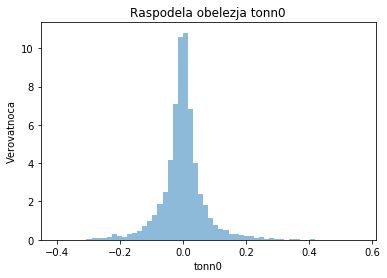

In [34]:
tonn0 = baza['tonn0']
plt.hist(tonn0, bins = 60, alpha=0.5, density=True)
plt.title('Raspodela obelezja tonn0')
plt.ylabel('Verovatnoca')
plt.xlabel('tonn0')

print('Koeficijent asimetrije iznosi %.2f' % skew(tonn0))
print('Koeficijent spljostenosti iznosi %.2f' % kurtosis(tonn0))

Koeficijent asimetrije iznosi -0.94
Koeficijent spljostenosti iznosi 6.81


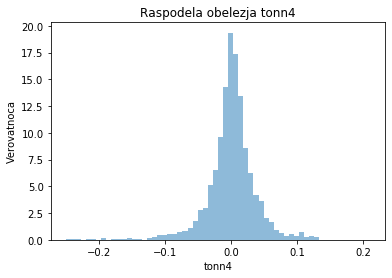

In [35]:
tonn4 = baza['tonn4']
plt.hist(tonn4, bins = 60, alpha=0.5, density=True)
plt.title('Raspodela obelezja tonn4')
plt.ylabel('Verovatnoca')
plt.xlabel('tonn4')

print('Koeficijent asimetrije iznosi %.2f' % skew(tonn4))
print('Koeficijent spljostenosti iznosi %.2f' % kurtosis(tonn4))

Koeficijent asimetrije iznosi -0.95
Koeficijent spljostenosti iznosi 0.67


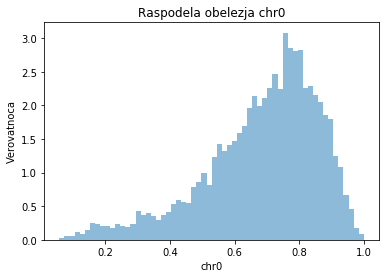

In [36]:
chr0 = baza['chr0']
plt.hist(chr0, bins = 60, alpha=0.5, density=True)
plt.title('Raspodela obelezja chr0')
plt.ylabel('Verovatnoca')
plt.xlabel('chr0')

print('Koeficijent asimetrije iznosi %.2f' % skew(chr0))
print('Koeficijent spljostenosti iznosi %.2f' % kurtosis(chr0))

Koeficijent asimetrije iznosi -1.00
Koeficijent spljostenosti iznosi 1.05


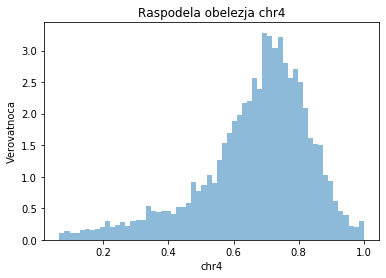

In [37]:
chr4 = baza['chr4']
plt.hist(chr4, bins = 60, alpha=0.5, density=True)
plt.title('Raspodela obelezja chr4')
plt.ylabel('Verovatnoca')
plt.xlabel('chr4')

print('Koeficijent asimetrije iznosi %.2f' % skew(chr4))
print('Koeficijent spljostenosti iznosi %.2f' % kurtosis(chr4))

Koeficijent asimetrije iznosi 30.00
Koeficijent spljostenosti iznosi 1058.95


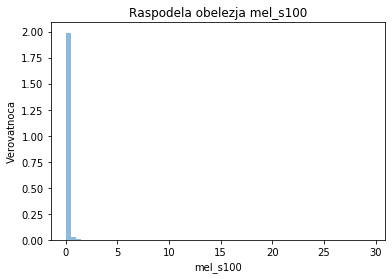

In [38]:
mel_s100 = baza['mel_s100']
plt.hist(mel_s100, bins = 60, alpha=0.5, density=True)
plt.title('Raspodela obelezja mel_s100')
plt.ylabel('Verovatnoca')
plt.xlabel('mel_s100')

print('Koeficijent asimetrije iznosi %.2f' % skew(mel_s100))
print('Koeficijent spljostenosti iznosi %.2f' % kurtosis(mel_s100))

Koeficijent asimetrije iznosi 12.60
Koeficijent spljostenosti iznosi 198.70


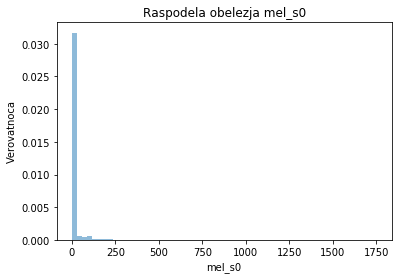

In [39]:
mel_s0 = baza['mel_s0']
plt.hist(mel_s0, bins = 60, alpha=0.5, density=True)
plt.title('Raspodela obelezja mel_s0')
plt.ylabel('Verovatnoca')
plt.xlabel('mel_s0')

print('Koeficijent asimetrije iznosi %.2f' % skew(mel_s0))
print('Koeficijent spljostenosti iznosi %.2f' % kurtosis(mel_s0))

Koeficijent asimetrije iznosi 10.97
Koeficijent spljostenosti iznosi 168.46


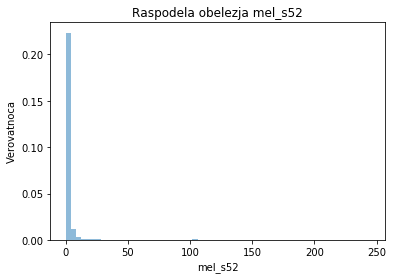

In [40]:
mel_s52 = baza['mel_s52']
plt.hist(mel_s52, bins = 60, alpha=0.5, density=True)
plt.title('Raspodela obelezja mel_s52')
plt.ylabel('Verovatnoca')
plt.xlabel('mel_s52')

print('Koeficijent asimetrije iznosi %.2f' % skew(mel_s52))
print('Koeficijent spljostenosti iznosi %.2f' % kurtosis(mel_s52))

Koeficijent asimetrije iznosi 27.48
Koeficijent spljostenosti iznosi 974.25


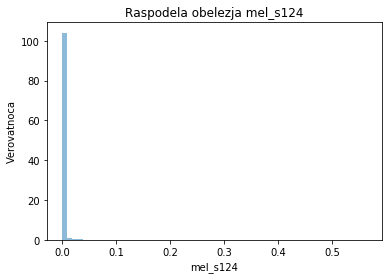

In [41]:
mel_s124 = baza['mel_s124']
plt.hist(mel_s124, bins = 60, alpha=0.5, density=True)
plt.title('Raspodela obelezja mel_s124')
plt.ylabel('Verovatnoca')
plt.xlabel('mel_s124')

print('Koeficijent asimetrije iznosi %.2f' % skew(mel_s124))
print('Koeficijent spljostenosti iznosi %.2f' % kurtosis(mel_s124))

In [42]:
#KLASIFIKACIJA

X = baza.iloc[:,1:]
y = baza.iloc[:,0]
jedinstvene_klase = y.unique()
print(jedinstvene_klase)

#s = StandardScaler()
#X_std = s.fit_transform(X)

['siren' 'street_music' 'drilling' 'dog_bark' 'children_playing'
 'gun_shot' 'engine_idling' 'air_conditioner' 'jackhammer' 'car_horn']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [44]:
l=list(y_test.unique())

def konvertovanje(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds)

#start = time.time()
#end = time.time()
#vreme = (end - start)

#print(convert(vreme))

In [45]:
#smanjeni skup podataka za trazenje otpimalnog parametra kod SVM-a
#uzimamo 20% podataka iz baze i nad manjim brojem podskupova

X_train_smanjeno, X_test_smanjeno, y_train_smanjeno, y_test_smanjeno = train_test_split(X, y, train_size=0.2, stratify=y, random_state=42)

print('Ukupno uzoraka: 5435')
print('Broj uzoraka u X train: ',len(X_train_smanjeno))
print('Broj uzoraka u X train: ',len(X_test_smanjeno))


Ukupno uzoraka: 5435
Broj uzoraka u X train:  1087
Broj uzoraka u X train:  4348


In [46]:
#nece biti dobra za razmatranje, potrebna je i osetljivost - nejednak udeo klasa, koliko je otislo na one verovatnije klase
def tacnost_po_klasi(mat_konf, klase):
    tacnost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        F = 0
        F = (sum(mat_konf[i,j]) + sum(mat_konf[j,i]))
        TN = sum(sum(mat_konf)) - F - TP
        tacnost_i.append((TP+TN)/sum(sum(mat_konf)))
        print('Za klasu ', klase[i], ' tacnost je: ', tacnost_i[i])
    tacnost_avg = np.mean(tacnost_i)
    return tacnost_avg

In [47]:
def osetljivost_po_klasi(mat_konf, klase):
    osetljivost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        FN = sum(mat_konf[i,j])
        osetljivost_i.append(TP/(TP+FN))
        print('Za klasu ', klase[i], ' osetljivost je: ', osetljivost_i[i])
    osetljivost_avg = np.mean(osetljivost_i)
    return osetljivost_avg

In [48]:
#KNN

In [50]:
kf_kNN = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
indexes = kf_kNN.split(X_train, y_train)

start = time.time()

tacnost_kNN = []
for k in [1, 5, 10]:
    for m in ['euclidean', 'manhattan', 'hamming', 'minkowski', 'jaccard', 'dice', 'chebyshev']:
        indexes = kf_kNN.split(X_train, y_train)
        tacnost_kNN_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
        for train_index, test_index in indexes:
            classifier = KNeighborsClassifier(n_neighbors = k, metric = m)
            classifier.fit(X_train.iloc[train_index,:], y_train.iloc[train_index])
            y_pred = classifier.predict(X_train.iloc[test_index,:])
            
            tacnost_kNN_tmp.append(accuracy_score(y_train.iloc[test_index], y_pred))
            
            fin_conf_mat += confusion_matrix(y_train.iloc[test_index], y_pred)
        print('\nZa parametre k =', k, ' i m =', m, ' tacnost je: ', np.mean(tacnost_kNN_tmp), ' a matrica konfuzije je:')
        print(fin_conf_mat)
        tacnost_kNN.append(np.mean(tacnost_kNN_tmp))
        
print('\n***************************************\n') 
print('\nNajbolja tacnost je u iteraciji broj: ', np.argmax(tacnost_kNN))

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')


Za parametre k = 1  i m = euclidean  tacnost je:  0.8923487114098588  a matrica konfuzije je:
[[467.   0.   1.   1.   0.   2.   0.   4.   2.   3.]
 [  4. 184.  18.  10.   4.   4.   1.   4.   2.  14.]
 [  8.   3. 418.  12.   4.   3.   5.   1.   1.  25.]
 [  7.   4.  30. 371.   7.   2.  18.   6.  17.  18.]
 [  5.   4.  13.   0. 435.   1.   1.  10.   3.   8.]
 [  3.   0.   9.   1.   1. 477.   0.   2.   0.   6.]
 [  1.   0.   5.   9.   2.   0. 156.   2.   2.   7.]
 [  0.   0.   1.   0.   2.   1.   0. 522.   1.   7.]
 [  2.   0.   7.  11.   2.   2.   0.   1. 459.   2.]
 [ 16.   5.  26.   9.   3.   9.   6.  12.   3. 391.]]

Za parametre k = 1  i m = manhattan  tacnost je:  0.9167117191376025  a matrica konfuzije je:
[[469.   1.   1.   1.   0.   1.   0.   3.   2.   2.]
 [  3. 193.  11.  11.   1.   5.   1.   2.   2.  16.]
 [  6.   2. 433.   9.   4.   3.   3.   2.   0.  18.]
 [  5.   0.  44. 385.   7.   3.  11.   5.  10.  10.]
 [  2.   4.   5.   0. 454.   0.   2.   5.   1.   7.]
 [  0.   0.   


Za parametre k = 10  i m = euclidean  tacnost je:  0.7612524322642246  a matrica konfuzije je:
[[442.   0.   8.   0.   0.   7.   4.  14.   1.   4.]
 [ 19. 140.  23.   6.   8.  20.   1.  12.   5.  11.]
 [ 28.   5. 372.   6.   8.  15.   4.   3.  16.  23.]
 [ 22.   5.  81. 275.   9.   6.  14.   7.  37.  24.]
 [ 21.   7.  31.   4. 349.  15.   2.  33.   8.  10.]
 [  6.   1.  14.   1.   1. 450.   6.   7.   8.   5.]
 [  6.   0.  12.  12.   3.   5. 134.   4.   3.   5.]
 [  7.   0.   3.   0.   3.  12.   0. 506.   0.   3.]
 [ 18.   2.  19.  18.   0.   4.   3.  14. 403.   5.]
 [ 36.   6.  87.  23.   8.  32.  12.  25.  12. 239.]]

Za parametre k = 10  i m = manhattan  tacnost je:  0.7826252821374526  a matrica konfuzije je:
[[449.   0.   6.   0.   0.   9.   0.   7.   1.   8.]
 [ 16. 140.  33.   3.   8.  22.   0.  13.   1.   9.]
 [ 26.   3. 398.   2.   7.  10.   2.   4.  12.  16.]
 [ 24.   1.  94. 260.   9.   6.  14.   9.  33.  30.]
 [ 17.   3.  33.   3. 378.   7.   4.  26.   5.   4.]
 [ 10.   0. 

In [51]:
#Za parametre k = 1  i m = manhattan  tacnost je:  0.9167117191376025

start = time.time()

classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
kNN_conf_mat = confusion_matrix(y_test, y_pred, labels = unikati)

print(kNN_conf_mat)
print('\nTRENING SKUP SA NAJBOLJIM PARAMETROM: k = 1, m = manhattan')

print('\nProcenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('Preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('Preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('Osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('Osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))
print('************************************************')

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')


MERE_USPESNOSTI_kNN = pd.DataFrame(columns = ['klasifikator','preciznost','tačnost','prosečna tačnost',
                                       'osetljivost','prosečna osetljivost','F mera'])

data = {'klasifikator':'kNN',
        'preciznost': precision_score(y_test, y_pred, average='micro'),
        'tačnost': accuracy_score(y_test, y_pred),
        'prosečna tačnost': tacnost_po_klasi(kNN_conf_mat, y.unique()),
        'osetljivost': recall_score(y_test, y_pred, average='micro'),
        'prosečna osetljivost': osetljivost_po_klasi(kNN_conf_mat, y.unique()),
        'F mera': f1_score(y_test, y_pred, average='micro')}

MERE_USPESNOSTI_kNN = MERE_USPESNOSTI_kNN.append(data,ignore_index = True)
MERE_USPESNOSTI_kNN.head()

[[112   1   0   3   4   0   0   1   0   0]
 [  0 109   1   0   9   0   0   0   1   0]
 [  1   1 117   0   0   1   0   0   0   0]
 [  1   3   6  90  12   5   1   0   2   0]
 [  0   0   2   4 111   2   0   1   0   0]
 [  1   0   1   1   1  42   0   0   0   0]
 [  0   1   0   0   1   0 120   0   0   3]
 [  0   0   1   2   0   0   0 117   0   0]
 [  0   0   0   0   0   0   0   0 134   0]
 [  1   1   0   1   1   0   3   0   2  52]]

TRENING SKUP SA NAJBOLJIM PARAMETROM: k = 1, m = manhattan

Procenat pogodjenih uzoraka:  0.9236430542778289
Preciznost mikro:  0.9236430542778289
Preciznost makro:  0.920930370901089
Osetljivost mikro:  0.9236430542778289
Osetljivost makro:  0.918445566269839
f mera mikro:  0.9236430542778289
f mera makro:  0.9180219000550507
************************************************
Vreme trajanja je:  0:00:01
Vreme trajanja je:  1.0542395114898682
************************************************
Za klasu  siren  tacnost je:  0.9880404783808647
Za klasu  street_music  t

,klasifikator,preciznost,tačnost,prosečna tačnost,osetljivost,prosečna osetljivost,F mera
0,kNN,0.923643,0.923643,0.984729,0.923643,0.918446,0.923643


In [52]:
#___smanjeno
#provera KNN-a nad smanjenom bazom nakon sto smo dobili rezultate koji se nisu dugo cekali za celokupnu bazu
#proveravamo da bismo znali koliko se razlikuje i koliko bi SVM bio drugaciji bez optimizacije parametara sa manjim skupom 

kf_kNN = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
indexes = kf_kNN.split(X_train_smanjeno, y_train_smanjeno)

start = time.time()

tacnost_kNN = []
for k in [1, 5, 10]:
    for m in ['euclidean', 'manhattan', 'hamming', 'minkowski', 'jaccard', 'dice', 'chebyshev']:
        indexes = kf_kNN.split(X_train_smanjeno, y_train_smanjeno)
        tacnost_kNN_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y_train_smanjeno)),len(np.unique(y_train_smanjeno))))
        for train_index, test_index in indexes:
            classifier = KNeighborsClassifier(n_neighbors = k, metric = m)
            classifier.fit(X_train_smanjeno.iloc[train_index,:], y_train_smanjeno.iloc[train_index])
            y_pred_smanjeno = classifier.predict(X_train_smanjeno.iloc[test_index,:])
            
            tacnost_kNN_tmp.append(accuracy_score(y_train_smanjeno.iloc[test_index], y_pred_smanjeno))
            
            fin_conf_mat += confusion_matrix(y_train_smanjeno.iloc[test_index], y_pred_smanjeno)
        print('\nZa parametre k =', k, ' i m =', m, ' tacnost je: ', np.mean(tacnost_kNN_tmp), ' a matrica konfuzije je:')
        print(fin_conf_mat)
        tacnost_kNN.append(np.mean(tacnost_kNN_tmp))
        
print('\n***************************************\n') 
print('\nNajbolja tacnost je u iteraciji broj: ', np.argmax(tacnost_kNN))

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')


Za parametre k = 1  i m = euclidean  tacnost je:  0.7532681260224561  a matrica konfuzije je:
[[105.   0.   3.   2.   0.   2.   0.   2.   1.   5.]
 [  3.  29.   8.   2.   1.  10.   1.   3.   2.   2.]
 [  7.   1.  89.   5.   4.   1.   2.   1.   2.   8.]
 [  3.   1.  10.  70.   4.   1.  13.   2.   6.  10.]
 [  9.   3.   6.   1.  88.   3.   2.   4.   0.   4.]
 [  2.   1.   4.   2.   0. 111.   1.   1.   1.   2.]
 [  0.   1.   4.   5.   2.   0.  30.   1.   0.   3.]
 [  0.   0.   2.   0.   0.   0.   0. 129.   0.   3.]
 [  4.   1.   2.   5.   1.   0.   1.   0. 104.   3.]
 [  5.   2.  18.   7.   4.   8.   3.   5.   4.  64.]]

Za parametre k = 1  i m = manhattan  tacnost je:  0.7955248696590975  a matrica konfuzije je:
[[107.   0.   4.   2.   0.   1.   0.   2.   0.   4.]
 [  2.  31.  10.   2.   2.   7.   1.   2.   1.   3.]
 [  5.   1.  98.   3.   0.   1.   0.   1.   3.   8.]
 [  3.   0.  12.  74.   4.   1.   7.   1.   9.   9.]
 [  6.   2.   6.   1.  93.   2.   1.   5.   0.   4.]
 [  1.   1.   


Za parametre k = 10  i m = euclidean  tacnost je:  0.58853589833655  a matrica konfuzije je:
[[ 90.   0.   2.   1.   0.  13.   0.   7.   3.   4.]
 [  5.  23.  15.   1.   1.   6.   0.   5.   1.   4.]
 [  8.   0.  84.   3.   3.   7.   0.   3.   3.   9.]
 [  5.   1.  19.  62.   2.   3.   7.   3.  11.   7.]
 [  9.   1.  14.   0.  64.  12.   0.  16.   0.   4.]
 [ 25.   1.  12.   4.   0.  67.   1.  10.   4.   1.]
 [  1.   0.   6.   9.   0.   2.  26.   1.   0.   1.]
 [ 10.   1.   6.   0.   1.   6.   0. 109.   0.   1.]
 [ 15.   0.   8.   7.   0.   1.   0.   8.  81.   1.]
 [ 19.   2.  26.   3.   4.  15.   4.  11.   2.  34.]]

Za parametre k = 10  i m = manhattan  tacnost je:  0.5988977038114267  a matrica konfuzije je:
[[ 89.   0.   7.   0.   0.   9.   0.  10.   1.   4.]
 [  3.  22.  14.   1.   1.  10.   0.   4.   3.   3.]
 [  8.   0.  87.   1.   5.   9.   0.   2.   1.   7.]
 [  8.   0.  24.  61.   4.   2.   4.   2.   8.   7.]
 [ 11.   2.  10.   1.  69.   8.   1.  17.   0.   1.]
 [ 26.   0.  1

In [53]:
#Za parametre k = 1  i m = manhattan  tacnost je:  0.7955248696590975

start = time.time()

classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
conf_mat_KNN = confusion_matrix(y_test, y_pred, labels = unikati)

print(conf_mat_KNN)
print('\nTRENING SKUP SA NAJBOLJIM PARAMETROM: k = 1, m = manhattan')

print('\nProcenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('Preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('Preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('Osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('Osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))
print('************************************************')

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')

[[112   1   0   3   4   0   0   1   0   0]
 [  0 109   1   0   9   0   0   0   1   0]
 [  1   1 117   0   0   1   0   0   0   0]
 [  1   3   6  90  12   5   1   0   2   0]
 [  0   0   2   4 111   2   0   1   0   0]
 [  1   0   1   1   1  42   0   0   0   0]
 [  0   1   0   0   1   0 120   0   0   3]
 [  0   0   1   2   0   0   0 117   0   0]
 [  0   0   0   0   0   0   0   0 134   0]
 [  1   1   0   1   1   0   3   0   2  52]]

TRENING SKUP SA NAJBOLJIM PARAMETROM: k = 1, m = manhattan

Procenat pogodjenih uzoraka:  0.9236430542778289
Preciznost mikro:  0.9236430542778289
Preciznost makro:  0.920930370901089
Osetljivost mikro:  0.9236430542778289
Osetljivost makro:  0.918445566269839
f mera mikro:  0.9236430542778289
f mera makro:  0.9180219000550507
************************************************
Vreme trajanja je:  0:00:01
Vreme trajanja je:  1.1148090362548828
************************************************


In [54]:
#SVM

In [55]:
#SAMO nad smanjenom bazom radjen jer u suprotnom zahteva previse vremena
#nad smanjenim brojem trening podataka samo optimizacija parametra, ostalo na celokupnom skupu iz baze

#unakrsna validacija 
kf_SVM = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
indexes = kf_SVM.split(X_train_smanjeno, y_train_smanjeno)

start = time.time()

tacnost_SVM = []                  
for c in [1,3,5]:     
    for F in ['linear', 'rbf','poly','sigmoid']:    
        for mc in ['ovo', 'ovr']:
            indexes = kf_SVM.split(X_train_smanjeno, y_train_smanjeno)
            tacnost_SVM_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_train_smanjeno)),len(np.unique(y_train_smanjeno))))
            for train_index, test_index in indexes:
                classifier = SVC(C=c, kernel=F, decision_function_shape=mc)
                classifier.fit(X_train_smanjeno.iloc[train_index,:], y_train_smanjeno.iloc[train_index])
                y_pred_smanjeno = classifier.predict(X_train_smanjeno.iloc[test_index,:])
                
                tacnost_SVM_tmp.append(accuracy_score(y_train_smanjeno.iloc[test_index], y_pred_smanjeno))
                
                fin_conf_mat += confusion_matrix(y_train_smanjeno.iloc[test_index], y_pred_smanjeno)
            print('\nZa parametre C =', c, ',kernel =', F, ' i pristup _', mc, '_ tacnost je: ', np.mean(tacnost_SVM_tmp),
                  ' a matrica konfuzije je:')
            print(fin_conf_mat)
            tacnost_SVM.append(np.mean(tacnost_SVM_tmp))
            
print('\n***************************************\n')            
print('Najbolja tacnost je u iteraciji broj: ', np.argmax(tacnost_SVM))

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')
#dodavanje kernela samo otezava rad iterativnog postupka




Za parametre C = 1 ,kernel = linear  i pristup _ ovo _ tacnost je:  0.6329349563220531  a matrica konfuzije je:
[[100.   0.   6.   2.   0.   4.   1.   2.   1.   4.]
 [  4.  39.   3.   3.   4.   3.   2.   2.   1.   0.]
 [  5.   3.  78.   6.   3.   3.   6.   4.   5.   7.]
 [  2.   2.  15.  52.   4.   8.  25.   1.  10.   1.]
 [  6.   3.  13.   8.  62.   3.   4.  17.   0.   4.]
 [  9.   2.   6.   4.   0.  90.   3.   1.   3.   7.]
 [  0.   0.   2.   4.   1.   1.  36.   1.   1.   0.]
 [  5.   0.   1.   0.  13.  10.   1. 102.   0.   2.]
 [  3.   0.   5.  15.   0.   2.   0.   2.  94.   0.]
 [ 15.   5.  23.   7.  14.   4.   6.   7.   4.  35.]]

Za parametre C = 1 ,kernel = linear  i pristup _ ovr _ tacnost je:  0.6329349563220531  a matrica konfuzije je:
[[100.   0.   6.   2.   0.   4.   1.   2.   1.   4.]
 [  4.  39.   3.   3.   4.   3.   2.   2.   1.   0.]
 [  5.   3.  78.   6.   3.   3.   6.   4.   5.   7.]
 [  2.   2.  15.  52.   4.   8.  25.   1.  10.   1.]
 [  6.   3.  13.   8.  62.   3.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 1 ,kernel = rbf  i pristup _ ovo _ tacnost je:  0.4121141522754426  a matrica konfuzije je:
[[ 64.   0.   0.  51.   0.   0.   0.   0.   0.   5.]
 [  0.   0.   2.  59.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  29.  87.   0.   0.   0.   0.   0.   4.]
 [  0.   0.   0. 119.   0.   0.   0.   0.   0.   1.]
 [  0.   0.   0.  93.  27.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  54.   0.  69.   0.   0.   0.   2.]
 [  0.   0.   0.  46.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  57.   0.   0.   0.  77.   0.   0.]
 [  0.   0.   0.  78.   0.   0.   0.   0.  43.   0.]
 [  1.   0.   3.  96.   0.   0.   0.   0.   0.  20.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 1 ,kernel = rbf  i pristup _ ovr _ tacnost je:  0.4121141522754426  a matrica konfuzije je:
[[ 64.   0.   0.  51.   0.   0.   0.   0.   0.   5.]
 [  0.   0.   2.  59.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  29.  87.   0.   0.   0.   0.   0.   4.]
 [  0.   0.   0. 119.   0.   0.   0.   0.   0.   1.]
 [  0.   0.   0.  93.  27.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  54.   0.  69.   0.   0.   0.   2.]
 [  0.   0.   0.  46.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  57.   0.   0.   0.  77.   0.   0.]
 [  0.   0.   0.  78.   0.   0.   0.   0.  43.   0.]
 [  1.   0.   3.  96.   0.   0.   0.   0.   0.  20.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 1 ,kernel = poly  i pristup _ ovo _ tacnost je:  0.7092955670375025  a matrica konfuzije je:
[[ 99.   1.   5.   0.   0.   2.   2.   5.   2.   4.]
 [  3.  37.   8.   3.   2.   2.   2.   2.   2.   0.]
 [  5.   2.  77.   3.   8.   0.   5.   2.   6.  12.]
 [  5.   1.   7.  68.   6.   1.  17.   0.  13.   2.]
 [  3.   5.   6.   3.  80.   2.   1.  10.   1.   9.]
 [  7.   1.   4.   3.   2.  99.   2.   0.   5.   2.]
 [  3.   0.   2.   6.   1.   1.  32.   0.   0.   1.]
 [  4.   0.   2.   0.   2.   1.   1. 123.   0.   1.]
 [  4.   0.   5.   9.   1.   2.   0.   1.  97.   2.]
 [  9.   2.  18.   6.   9.   6.   4.   3.   4.  59.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 1 ,kernel = poly  i pristup _ ovr _ tacnost je:  0.7092955670375025  a matrica konfuzije je:
[[ 99.   1.   5.   0.   0.   2.   2.   5.   2.   4.]
 [  3.  37.   8.   3.   2.   2.   2.   2.   2.   0.]
 [  5.   2.  77.   3.   8.   0.   5.   2.   6.  12.]
 [  5.   1.   7.  68.   6.   1.  17.   0.  13.   2.]
 [  3.   5.   6.   3.  80.   2.   1.  10.   1.   9.]
 [  7.   1.   4.   3.   2.  99.   2.   0.   5.   2.]
 [  3.   0.   2.   6.   1.   1.  32.   0.   0.   1.]
 [  4.   0.   2.   0.   2.   1.   1. 123.   0.   1.]
 [  4.   0.   5.   9.   1.   2.   0.   1.  97.   2.]
 [  9.   2.  18.   6.   9.   6.   4.   3.   4.  59.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 1 ,kernel = sigmoid  i pristup _ ovo _ tacnost je:  0.12327390649971295  a matrica konfuzije je:
[[  0.   0.   0.   0.   0.   1.   0. 119.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  61.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0. 119.   0.   0.]
 [  0.   0.   0.   0.   4.  13.   0. 103.   0.   0.]
 [  0.   0.   0.   0.   0.   7.   0. 106.   7.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 125.   0.   0.]
 [  0.   0.   0.   0.   1.   9.   0.  36.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 134.   0.   0.]
 [  0.   0.   0.   0.   4.   5.   0. 112.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 120.   0.   0.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 1 ,kernel = sigmoid  i pristup _ ovr _ tacnost je:  0.12327390649971295  a matrica konfuzije je:
[[  0.   0.   0.   0.   0.   1.   0. 119.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  61.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0. 119.   0.   0.]
 [  0.   0.   0.   0.   4.  13.   0. 103.   0.   0.]
 [  0.   0.   0.   0.   0.   7.   0. 106.   7.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 125.   0.   0.]
 [  0.   0.   0.   0.   1.   9.   0.  36.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 134.   0.   0.]
 [  0.   0.   0.   0.   4.   5.   0. 112.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 120.   0.   0.]]

Za parametre C = 3 ,kernel = linear  i pristup _ ovo _ tacnost je:  0.6283053266924234  a matrica konfuzije je:
[[100.   1.   5.   2.   0.   4.   2.   2.   2.   2.]
 [  3.  39.   6.   3.   3.   2.   2.   2.   1.   0.]
 [  8.   2.  76.   6.   3.   4.   5.   4.   5.   7.]
 [  2.   1.  13.  55.   6.   6.  25.   1.  10.   1.]
 [  6.   3.  15.   7.  59.   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 3 ,kernel = rbf  i pristup _ ovo _ tacnost je:  0.43419672919672925  a matrica konfuzije je:
[[ 65.   0.   0.  49.   0.   0.   0.   0.   0.   6.]
 [  0.   0.   2.  58.   0.   0.   0.   0.   0.   1.]
 [  0.   1.  34.  81.   0.   0.   0.   0.   0.   4.]
 [  0.   0.   0. 118.   0.   0.   0.   0.   0.   2.]
 [  0.   0.   0.  88.  32.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  50.   0.  72.   0.   0.   0.   3.]
 [  0.   0.   0.  43.   0.   0.   3.   0.   0.   0.]
 [  0.   0.   0.  53.   0.   0.   0.  80.   0.   1.]
 [  0.   0.   0.  74.   0.   0.   0.   0.  46.   1.]
 [  1.   0.   3.  94.   0.   0.   0.   0.   0.  22.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 3 ,kernel = rbf  i pristup _ ovr _ tacnost je:  0.43419672919672925  a matrica konfuzije je:
[[ 65.   0.   0.  49.   0.   0.   0.   0.   0.   6.]
 [  0.   0.   2.  58.   0.   0.   0.   0.   0.   1.]
 [  0.   1.  34.  81.   0.   0.   0.   0.   0.   4.]
 [  0.   0.   0. 118.   0.   0.   0.   0.   0.   2.]
 [  0.   0.   0.  88.  32.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  50.   0.  72.   0.   0.   0.   3.]
 [  0.   0.   0.  43.   0.   0.   3.   0.   0.   0.]
 [  0.   0.   0.  53.   0.   0.   0.  80.   0.   1.]
 [  0.   0.   0.  74.   0.   0.   0.   0.  46.   1.]
 [  1.   0.   3.  94.   0.   0.   0.   0.   0.  22.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 3 ,kernel = poly  i pristup _ ovo _ tacnost je:  0.7092955670375025  a matrica konfuzije je:
[[ 99.   1.   5.   0.   0.   2.   2.   5.   2.   4.]
 [  3.  37.   8.   3.   2.   2.   2.   2.   2.   0.]
 [  5.   2.  77.   3.   8.   0.   5.   2.   6.  12.]
 [  5.   1.   7.  68.   6.   1.  17.   0.  13.   2.]
 [  3.   5.   6.   3.  80.   2.   1.  10.   1.   9.]
 [  7.   1.   4.   3.   2.  99.   2.   0.   5.   2.]
 [  3.   0.   2.   6.   1.   1.  32.   0.   0.   1.]
 [  4.   0.   2.   0.   2.   1.   1. 123.   0.   1.]
 [  4.   0.   5.   9.   1.   2.   0.   1.  97.   2.]
 [  9.   2.  18.   6.   9.   6.   4.   3.   4.  59.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 3 ,kernel = poly  i pristup _ ovr _ tacnost je:  0.7092955670375025  a matrica konfuzije je:
[[ 99.   1.   5.   0.   0.   2.   2.   5.   2.   4.]
 [  3.  37.   8.   3.   2.   2.   2.   2.   2.   0.]
 [  5.   2.  77.   3.   8.   0.   5.   2.   6.  12.]
 [  5.   1.   7.  68.   6.   1.  17.   0.  13.   2.]
 [  3.   5.   6.   3.  80.   2.   1.  10.   1.   9.]
 [  7.   1.   4.   3.   2.  99.   2.   0.   5.   2.]
 [  3.   0.   2.   6.   1.   1.  32.   0.   0.   1.]
 [  4.   0.   2.   0.   2.   1.   1. 123.   0.   1.]
 [  4.   0.   5.   9.   1.   2.   0.   1.  97.   2.]
 [  9.   2.  18.   6.   9.   6.   4.   3.   4.  59.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 3 ,kernel = sigmoid  i pristup _ ovo _ tacnost je:  0.12418299740880386  a matrica konfuzije je:
[[  0.   0.   0.   0.   0.   1.   0. 119.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  61.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0. 119.   0.   0.]
 [  0.   0.   0.   0.   4.  13.   0. 103.   0.   0.]
 [  0.   0.   0.   0.   1.  10.   0. 102.   7.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 125.   0.   0.]
 [  0.   0.   0.   0.   1.   9.   0.  36.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 134.   0.   0.]
 [  0.   0.   0.   0.   6.   5.   0. 110.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 120.   0.   0.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 3 ,kernel = sigmoid  i pristup _ ovr _ tacnost je:  0.12418299740880386  a matrica konfuzije je:
[[  0.   0.   0.   0.   0.   1.   0. 119.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  61.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0. 119.   0.   0.]
 [  0.   0.   0.   0.   4.  13.   0. 103.   0.   0.]
 [  0.   0.   0.   0.   1.  10.   0. 102.   7.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 125.   0.   0.]
 [  0.   0.   0.   0.   1.   9.   0.  36.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 134.   0.   0.]
 [  0.   0.   0.   0.   6.   5.   0. 110.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 120.   0.   0.]]

Za parametre C = 5 ,kernel = linear  i pristup _ ovo _ tacnost je:  0.6237012987012986  a matrica konfuzije je:
[[ 99.   1.   4.   2.   0.   5.   2.   1.   2.   4.]
 [  3.  39.   6.   3.   3.   2.   2.   2.   1.   0.]
 [  8.   2.  75.   8.   4.   4.   5.   4.   4.   6.]
 [  2.   1.  12.  53.   7.   7.  26.   1.  10.   1.]
 [  6.   3.  15.   7.  60.   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 5 ,kernel = rbf  i pristup _ ovo _ tacnost je:  0.43419672919672925  a matrica konfuzije je:
[[ 65.   0.   0.  49.   0.   0.   0.   0.   0.   6.]
 [  0.   0.   2.  58.   0.   0.   0.   0.   0.   1.]
 [  0.   1.  34.  81.   0.   0.   0.   0.   0.   4.]
 [  0.   0.   0. 118.   0.   0.   0.   0.   0.   2.]
 [  0.   0.   0.  88.  32.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  50.   0.  72.   0.   0.   0.   3.]
 [  0.   0.   0.  43.   0.   0.   3.   0.   0.   0.]
 [  0.   0.   0.  53.   0.   0.   0.  80.   0.   1.]
 [  0.   0.   0.  74.   0.   0.   0.   0.  46.   1.]
 [  1.   0.   3.  94.   0.   0.   0.   0.   0.  22.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 5 ,kernel = rbf  i pristup _ ovr _ tacnost je:  0.43419672919672925  a matrica konfuzije je:
[[ 65.   0.   0.  49.   0.   0.   0.   0.   0.   6.]
 [  0.   0.   2.  58.   0.   0.   0.   0.   0.   1.]
 [  0.   1.  34.  81.   0.   0.   0.   0.   0.   4.]
 [  0.   0.   0. 118.   0.   0.   0.   0.   0.   2.]
 [  0.   0.   0.  88.  32.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  50.   0.  72.   0.   0.   0.   3.]
 [  0.   0.   0.  43.   0.   0.   3.   0.   0.   0.]
 [  0.   0.   0.  53.   0.   0.   0.  80.   0.   1.]
 [  0.   0.   0.  74.   0.   0.   0.   0.  46.   1.]
 [  1.   0.   3.  94.   0.   0.   0.   0.   0.  22.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 5 ,kernel = poly  i pristup _ ovo _ tacnost je:  0.7092955670375025  a matrica konfuzije je:
[[ 99.   1.   5.   0.   0.   2.   2.   5.   2.   4.]
 [  3.  37.   8.   3.   2.   2.   2.   2.   2.   0.]
 [  5.   2.  77.   3.   8.   0.   5.   2.   6.  12.]
 [  5.   1.   7.  68.   6.   1.  17.   0.  13.   2.]
 [  3.   5.   6.   3.  80.   2.   1.  10.   1.   9.]
 [  7.   1.   4.   3.   2.  99.   2.   0.   5.   2.]
 [  3.   0.   2.   6.   1.   1.  32.   0.   0.   1.]
 [  4.   0.   2.   0.   2.   1.   1. 123.   0.   1.]
 [  4.   0.   5.   9.   1.   2.   0.   1.  97.   2.]
 [  9.   2.  18.   6.   9.   6.   4.   3.   4.  59.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 5 ,kernel = poly  i pristup _ ovr _ tacnost je:  0.7092955670375025  a matrica konfuzije je:
[[ 99.   1.   5.   0.   0.   2.   2.   5.   2.   4.]
 [  3.  37.   8.   3.   2.   2.   2.   2.   2.   0.]
 [  5.   2.  77.   3.   8.   0.   5.   2.   6.  12.]
 [  5.   1.   7.  68.   6.   1.  17.   0.  13.   2.]
 [  3.   5.   6.   3.  80.   2.   1.  10.   1.   9.]
 [  7.   1.   4.   3.   2.  99.   2.   0.   5.   2.]
 [  3.   0.   2.   6.   1.   1.  32.   0.   0.   1.]
 [  4.   0.   2.   0.   2.   1.   1. 123.   0.   1.]
 [  4.   0.   5.   9.   1.   2.   0.   1.  97.   2.]
 [  9.   2.  18.   6.   9.   6.   4.   3.   4.  59.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 5 ,kernel = sigmoid  i pristup _ ovo _ tacnost je:  0.12418299740880386  a matrica konfuzije je:
[[  0.   0.   0.   0.   0.   0.   0. 120.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  61.   0.   0.]
 [  0.   0.   0.   0.   1.   1.   0. 118.   0.   0.]
 [  0.   0.   0.   0.   4.  13.   0. 103.   0.   0.]
 [  0.   0.   0.   0.   1.  11.   0. 101.   7.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 125.   0.   0.]
 [  0.   0.   0.   0.   1.   8.   0.  37.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 134.   0.   0.]
 [  0.   0.   0.   0.   5.   4.   0. 112.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 120.   0.   0.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni


Za parametre C = 5 ,kernel = sigmoid  i pristup _ ovr _ tacnost je:  0.12418299740880386  a matrica konfuzije je:
[[  0.   0.   0.   0.   0.   0.   0. 120.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  61.   0.   0.]
 [  0.   0.   0.   0.   1.   1.   0. 118.   0.   0.]
 [  0.   0.   0.   0.   4.  13.   0. 103.   0.   0.]
 [  0.   0.   0.   0.   1.  11.   0. 101.   7.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 125.   0.   0.]
 [  0.   0.   0.   0.   1.   8.   0.  37.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 134.   0.   0.]
 [  0.   0.   0.   0.   5.   4.   0. 112.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 120.   0.   0.]]

***************************************

Najbolja tacnost je u iteraciji broj:  4
Vreme trajanja je:  0:06:02
Vreme trajanja je:  362.0399224758148
************************************************


In [56]:
#Za parametre C = 1 ,kernel = poly  i pristup _ ovo _ tacnost je:  0.7092955670375025

#unakrsna validacija 
kf_SVM = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf_SVM.split(X_train, y_train)   

start = time.time()

classifier = SVC(C=1, kernel='poly', decision_function_shape='ovo')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
SVM_conf_mat = confusion_matrix(y_test,y_pred,labels = l)

print(SVM_conf_mat)
print('\nTRENING SKUP SA NAJBOLJIM PARAMETROM: C = 1,kernel = poly, pristup:OVO')

print('\nProcenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('Preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('Preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('Osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('Osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))
print('************************************************')

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')

MERE_USPESNOSTI_SVM = pd.DataFrame(columns = ['klasifikator','preciznost','tačnost','prosečna tačnost',
                                       'osetljivost','prosečna osetljivost','F mera'])

data = {'klasifikator':'SVM',
        'preciznost': precision_score(y_test, y_pred, average='micro'),
        'tačnost': accuracy_score(y_test, y_pred),
        'prosečna tačnost': tacnost_po_klasi(SVM_conf_mat, y.unique()),
        'osetljivost': recall_score(y_test, y_pred, average='micro'),
        'prosečna osetljivost': osetljivost_po_klasi(SVM_conf_mat, y.unique()),
        'F mera': f1_score(y_test, y_pred, average='micro')}

MERE_USPESNOSTI_SVM = MERE_USPESNOSTI_SVM.append(data,ignore_index = True)
MERE_USPESNOSTI_SVM.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[128   2   1   1   0   0   1   0   0   1]
 [  0  96   7   5   0   1   2   3   4   2]
 [  0   1 107   1   0   2   2   1   6   0]
 [  0   0   0 116   0   1   1   1   0   1]
 [  0   3   0   1 114   1   3   0   0   3]
 [  0   4   0   0   1 110   0   3   2   1]
 [  2   3   6   2   1   1  85   1  18   1]
 [  0   3   0   0   0   0   0  42   1   0]
 [  2   4   1   1   2   1   3   1 104   1]
 [  1   0   2   3   0   0   1   1   2  51]]

TRENING SKUP SA NAJBOLJIM PARAMETROM: C = 1,kernel = poly, pristup:OVO

Procenat pogodjenih uzoraka:  0.8767249310027599
Preciznost mikro:  0.8767249310027599
Preciznost makro:  0.8706465205460405
Osetljivost mikro:  0.8767249310027599
Osetljivost makro:  0.8758757175052618
f mera mikro:  0.87672493100276
f mera makro:  0.8713756810744127
************************************************
Vreme trajanja je:  0:00:20
Vreme trajanja je:  20.716638565063477
************************************************
Za klasu  siren  tacnost je:  0.9898804047838087
Za klasu  str

,klasifikator,preciznost,tačnost,prosečna tačnost,osetljivost,prosečna osetljivost,F mera
0,SVM,0.876725,0.876725,0.975345,0.876725,0.875876,0.876725


In [57]:
#provera posebno za polinomijalni kernel sa parametrom degree

#unakrsna validacija 
kf_SVM_ = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf_SVM_.split(X_train, y_train)

start = time.time()

#sve veci stepen polinoma oduzima vise vremena, a ne daje dobre rezultate, najbolji stepen 2 i 3
classifier = SVC(C=1, degree = 2, kernel='poly', decision_function_shape='ovo')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
SVM_conf_mat = confusion_matrix(y_test,y_pred,labels = l)

print(SVM_conf_mat)
print('\nTRENING SKUP SA NAJBOLJIM PARAMETROM: C = 1,kernel = poly, pristup:OVO')

print('\nProcenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('Preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('Preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('Osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('Osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))
print('************************************************')

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[129   2   0   1   0   0   2   0   0   0]
 [  0  96   7   1   0   1   2   4   9   0]
 [  0   1 111   0   0   1   1   1   5   0]
 [  0   1   0 116   0   1   0   1   0   1]
 [  0   1   0   1 115   1   3   0   0   4]
 [  0   5   0   0   1 108   2   3   1   1]
 [  1   6   4   4   2   2  81   1  17   2]
 [  0   2   1   0   0   0   0  41   1   1]
 [  2   4   2   1   3   1   2   1 102   2]
 [  1   0   2   1   1   0   1   1   2  52]]

TRENING SKUP SA NAJBOLJIM PARAMETROM: C = 1,kernel = poly, pristup:OVO

Procenat pogodjenih uzoraka:  0.874885004599816
Preciznost mikro:  0.874885004599816
Preciznost makro:  0.8672462673859783
Osetljivost mikro:  0.874885004599816
Osetljivost makro:  0.873567858152145
f mera mikro:  0.874885004599816
f mera makro:  0.8682943521438196
************************************************
Vreme trajanja je:  0:00:35
Vreme trajanja je:  35.7501266002655
************************************************


In [58]:
#LOGISTICKA REGRESIJA

In [60]:
#unakrsna validacija 
kf_Log = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf_Log.split(X_train, y_train)

start = time.time()


tacnost_Log = []
for c in [100, 500, 1000, 2500]:
    for F in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
#        for mc in ['multinomial', 'ovr', 'auto']:     
            indexes = kf_Log.split(X_train,y_train)
            tacnost_Log_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
            for train_index, test_index in indexes:
                classifier = LogisticRegression(max_iter=c, solver=F) #multi_class=mc)
                classifier.fit(X_train, y_train)
                y_pred = classifier.predict(X_test)
                
                tacnost_Log_tmp.append(accuracy_score(y_test, y_pred))
                
                fin_conf_mat += confusion_matrix(y_test, y_pred)
            print('\nZa parametre C =', c, ',kernel =', F, ' tacnost je: ', np.mean(tacnost_Log_tmp),
                  ' a matrica konfuzije je:')
            print(fin_conf_mat)
            tacnost_Log.append(np.mean(tacnost_Log_tmp))
            
print('\n***************************************\n')            
print('Najbolja tacnost je u iteraciji broj: ', np.argmax(tacnost_Log))

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa


Za parametre C = 100 ,kernel = newton-cg  tacnost je:  0.7111315547378105  a matrica konfuzije je:
[[ 980.   10.   50.   10.    0.   40.    0.   90.   10.   10.]
 [  30.  440.   50.    0.   20.   10.   20.   10.    0.   30.]
 [  50.   20.  790.  100.   60.   40.   10.   10.   10.  110.]
 [  70.   40.  140.  690.   90.   40.   40.   20.   60.   10.]
 [  10.   30.   80.   10.  860.   70.   10.   70.    0.   60.]
 [ 250.    0.   20.   20.   20.  770.   30.   70.   30.   40.]
 [   0.    0.    0.   10.   10.   10.  430.    0.    0.    0.]
 [  20.    0.   20.    0.   50.   60.    0. 1170.    0.   20.]
 [  40.    0.   30.   40.    0.   20.   10.    0. 1000.   70.]
 [ 100.   10.  250.   30.   20.   60.   20.   50.   60.  600.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc


Za parametre C = 100 ,kernel = lbfgs  tacnost je:  0.6271389144434223  a matrica konfuzije je:
[[ 756.   10.  212.   20.    0.   30.    0.  120.   10.   42.]
 [  47.  450.    6.   10.    0.   20.    4.   70.    0.    3.]
 [  89.    0.  766.   75.   59.   40.   30.   30.   31.   80.]
 [  74.   27.  139.  655.  101.   10.   33.   22.  121.   18.]
 [  43.   39.   91.   20.  756.   50.   30.  137.   14.   20.]
 [ 227.   40.   60.   65.   10.  570.   20.  140.   98.   20.]
 [   0.    0.    0.  138.    0.   20.  302.    0.    0.    0.]
 [  69.    0.   11.    0.   70.   40.    0. 1120.    0.   30.]
 [  19.    0.   48.   41.    0.   54.   10.    0. 1009.   29.]
 [ 110.   20.  371.   35.   39.   62.   21.   40.   69.  433.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to co


Za parametre C = 100 ,kernel = liblinear  tacnost je:  0.6494940202391905  a matrica konfuzije je:
[[ 780.   10.  160.   50.   10.   30.    0.  120.   10.   30.]
 [  30.  470.   20.    0.   10.   20.    0.   50.    0.   10.]
 [ 110.   20.  710.  110.   50.   40.   30.   20.   20.   90.]
 [  90.   40.  120.  660.  110.   20.   30.   20.  100.   10.]
 [  20.   20.  120.   20.  800.   20.   20.  120.    0.   60.]
 [ 240.   20.   50.   80.   10.  650.   30.   90.   50.   30.]
 [   0.    0.    0.  130.   30.    0.  300.    0.    0.    0.]
 [  50.    0.   20.    0.   60.   60.    0. 1130.    0.   20.]
 [  50.    0.   40.   30.    0.   20.   10.    0.  980.   80.]
 [ 100.   10.  270.   30.   20.   50.   30.   40.   70.  580.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning


Za parametre C = 100 ,kernel = sag  tacnost je:  0.5541858325666974  a matrica konfuzije je:
[[ 650.    0.  190.   10.    0.   20.    0.  190.   90.   50.]
 [  20.  310.   90.    0.   20.   10.   10.  130.    0.   20.]
 [  90.    0.  730.  110.   60.   20.   10.   50.   50.   80.]
 [  80.   30.  120.  674.  109.    0.   20.   20.  127.   20.]
 [  60.    0.  130.   30.  690.   10.   10.  180.   80.   10.]
 [ 230.   10.  120.   50.   30.  470.   30.  150.   90.   70.]
 [   0.    0.   10.  210.   20.   40.  120.    0.    0.   60.]
 [ 108.    0.    0.    0.  160.   22.    0. 1030.   10.   10.]
 [  30.    0.   90.   90.   10.   40.    0.   30.  910.   10.]
 [ 130.    0.  350.   60.   20.   70.    0.   60.   70.  440.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning


Za parametre C = 100 ,kernel = saga  tacnost je:  0.5206991720331187  a matrica konfuzije je:
[[ 640.    0.  180.    0.    0.   20.    0.  190.  120.   50.]
 [  20.  240.   90.   20.   30.   10.    0.  170.   20.   10.]
 [ 110.    0.  680.  120.   60.   30.   10.   40.   80.   70.]
 [  80.   20.  110.  620.  120.    0.   30.   20.  170.   30.]
 [  50.    0.  130.   30.  680.   10.   10.  190.   90.   10.]
 [ 240.    0.  160.   40.   20.  430.   20.  210.   60.   70.]
 [   0.    0.   10.  200.   30.   50.   80.    0.    0.   90.]
 [  90.    0.    0.    0.  170.   10.    0. 1040.    0.   30.]
 [  20.    0.  110.  130.   10.   40.    0.   40.  850.   10.]
 [ 180.    0.  330.   60.   30.   50.    0.   80.   70.  400.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa


Za parametre C = 500 ,kernel = newton-cg  tacnost je:  0.7111315547378105  a matrica konfuzije je:
[[ 980.   10.   50.   10.    0.   40.    0.   90.   10.   10.]
 [  30.  440.   50.    0.   20.   10.   20.   10.    0.   30.]
 [  50.   20.  790.  100.   60.   40.   10.   10.   10.  110.]
 [  70.   40.  140.  690.   90.   40.   40.   20.   60.   10.]
 [  10.   30.   80.   10.  860.   70.   10.   70.    0.   60.]
 [ 250.    0.   20.   20.   20.  770.   30.   70.   30.   40.]
 [   0.    0.    0.   10.   10.   10.  430.    0.    0.    0.]
 [  20.    0.   20.    0.   50.   60.    0. 1170.    0.   20.]
 [  40.    0.   30.   40.    0.   20.   10.    0. 1000.   70.]
 [ 100.   10.  250.   30.   20.   60.   20.   50.   60.  600.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc


Za parametre C = 500 ,kernel = lbfgs  tacnost je:  0.6610855565777368  a matrica konfuzije je:
[[8.750e+02 1.300e+01 1.560e+02 2.000e+01 0.000e+00 2.200e+01 0.000e+00
  7.400e+01 1.000e+01 3.000e+01]
 [3.900e+01 4.610e+02 2.100e+01 0.000e+00 2.000e+01 1.000e+01 2.600e+01
  2.400e+01 0.000e+00 9.000e+00]
 [1.050e+02 1.500e+01 7.270e+02 1.030e+02 5.100e+01 4.000e+01 2.800e+01
  2.000e+01 1.000e+01 1.010e+02]
 [8.100e+01 3.500e+01 1.290e+02 6.960e+02 1.000e+02 3.200e+01 2.200e+01
  2.000e+01 7.500e+01 1.000e+01]
 [5.500e+01 2.000e+01 1.100e+02 1.500e+01 7.880e+02 4.500e+01 3.000e+01
  1.080e+02 0.000e+00 2.900e+01]
 [2.400e+02 2.200e+01 6.100e+01 1.030e+02 2.100e+01 6.200e+02 3.400e+01
  7.900e+01 5.300e+01 1.700e+01]
 [0.000e+00 0.000e+00 0.000e+00 8.800e+01 2.000e+01 0.000e+00 3.510e+02
  0.000e+00 0.000e+00 1.000e+00]
 [4.600e+01 0.000e+00 3.200e+01 0.000e+00 4.000e+01 5.800e+01 0.000e+00
  1.144e+03 0.000e+00 2.000e+01]
 [4.100e+01 0.000e+00 1.000e+01 3.000e+01 4.000e+00 4.300e+01 1.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa


Za parametre C = 500 ,kernel = liblinear  tacnost je:  0.6991720331186752  a matrica konfuzije je:
[[ 960.   10.   80.   10.    0.   50.    0.   80.   10.    0.]
 [  20.  470.   50.    0.   20.   10.   20.   10.    0.   10.]
 [  90.   20.  740.  110.   60.   40.   20.   20.   10.   90.]
 [  90.   40.  140.  690.  100.   30.   20.   20.   60.   10.]
 [  20.   20.  100.   10.  840.   60.   10.   90.    0.   50.]
 [ 230.    0.   50.   20.   20.  760.   40.   70.   20.   40.]
 [   0.    0.    0.   70.   10.   10.  370.    0.    0.    0.]
 [  20.    0.   20.    0.   50.   70.    0. 1160.    0.   20.]
 [  40.    0.   20.   30.    0.   20.   10.    0. 1020.   70.]
 [  70.   10.  270.   30.   20.   60.   30.   70.   50.  590.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning


Za parametre C = 500 ,kernel = sag  tacnost je:  0.5988960441582336  a matrica konfuzije je:
[[ 690.    0.  200.   10.    0.   30.    0.  180.   80.   10.]
 [  60.  420.   20.    0.   10.   10.    0.   90.    0.    0.]
 [  90.    0.  750.  100.   70.   20.   20.   40.   30.   80.]
 [  70.   30.  100.  730.  110.    0.   20.   10.  110.   20.]
 [ 110.   20.  110.   10.  700.   40.   10.  160.    0.   40.]
 [ 250.   20.   90.   30.    0.  560.   30.  140.  110.   20.]
 [   0.    0.   10.  190.   10.   10.  200.    0.   10.   30.]
 [ 100.    0.   10.    0.   90.   30.    0. 1060.    0.   50.]
 [  30.    0.   50.   50.   10.   80.   10.   10.  970.    0.]
 [ 110.   10.  390.   50.   30.   60.   20.   40.   60.  430.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning


Za parametre C = 500 ,kernel = saga  tacnost je:  0.5777368905243792  a matrica konfuzije je:
[[ 680.    0.  180.   10.    0.   27.    0.  183.   80.   40.]
 [  46.  370.   54.    0.   10.   10.    0.  100.    0.   20.]
 [ 110.    0.  710.  110.   70.   20.   20.   40.   40.   80.]
 [  70.   30.  100.  730.  110.    0.   20.   20.  100.   20.]
 [ 100.   20.  100.   20.  690.   20.   10.  170.   20.   50.]
 [ 250.   10.  100.   30.   30.  500.   30.  150.  110.   40.]
 [   0.    0.   10.  210.   10.   20.  180.    0.    0.   30.]
 [ 100.    0.    0.    0.  140.   30.    0. 1030.   10.   30.]
 [  30.    0.   50.   60.   10.   70.    0.   30.  950.   10.]
 [ 110.    0.  380.   60.   20.   70.   10.   40.   70.  440.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa


Za parametre C = 1000 ,kernel = newton-cg  tacnost je:  0.7111315547378105  a matrica konfuzije je:
[[ 980.   10.   50.   10.    0.   40.    0.   90.   10.   10.]
 [  30.  440.   50.    0.   20.   10.   20.   10.    0.   30.]
 [  50.   20.  790.  100.   60.   40.   10.   10.   10.  110.]
 [  70.   40.  140.  690.   90.   40.   40.   20.   60.   10.]
 [  10.   30.   80.   10.  860.   70.   10.   70.    0.   60.]
 [ 250.    0.   20.   20.   20.  770.   30.   70.   30.   40.]
 [   0.    0.    0.   10.   10.   10.  430.    0.    0.    0.]
 [  20.    0.   20.    0.   50.   60.    0. 1170.    0.   20.]
 [  40.    0.   30.   40.    0.   20.   10.    0. 1000.   70.]
 [ 100.   10.  250.   30.   20.   60.   20.   50.   60.  600.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc


Za parametre C = 1000 ,kernel = lbfgs  tacnost je:  0.6850965961361546  a matrica konfuzije je:
[[8.950e+02 1.000e+01 1.250e+02 1.400e+01 1.000e+00 3.400e+01 0.000e+00
  8.000e+01 1.000e+01 3.100e+01]
 [3.800e+01 4.700e+02 2.300e+01 0.000e+00 2.000e+01 1.000e+01 1.900e+01
  2.000e+01 0.000e+00 1.000e+01]
 [9.200e+01 2.000e+01 7.090e+02 1.190e+02 6.400e+01 4.500e+01 1.200e+01
  2.200e+01 1.000e+01 1.070e+02]
 [6.800e+01 3.000e+01 1.200e+02 7.230e+02 1.000e+02 2.300e+01 2.000e+01
  2.600e+01 7.600e+01 1.400e+01]
 [3.300e+01 2.000e+01 1.030e+02 9.000e+00 8.360e+02 5.000e+01 1.600e+01
  7.800e+01 9.000e+00 4.600e+01]
 [2.450e+02 2.000e+00 4.100e+01 6.700e+01 1.900e+01 6.910e+02 3.000e+01
  7.100e+01 3.500e+01 4.900e+01]
 [0.000e+00 0.000e+00 0.000e+00 5.500e+01 1.500e+01 5.000e+00 3.850e+02
  0.000e+00 0.000e+00 0.000e+00]
 [3.800e+01 0.000e+00 1.500e+01 0.000e+00 4.200e+01 6.000e+01 0.000e+00
  1.165e+03 0.000e+00 2.000e+01]
 [4.400e+01 0.000e+00 1.000e+01 3.000e+01 1.000e+01 2.500e+01 1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa


Za parametre C = 1000 ,kernel = liblinear  tacnost je:  0.6991720331186752  a matrica konfuzije je:
[[ 960.   10.   80.   10.    0.   50.    0.   80.   10.    0.]
 [  20.  470.   50.    0.   20.   10.   20.   10.    0.   10.]
 [  90.   20.  740.  110.   60.   40.   20.   20.   10.   90.]
 [  90.   40.  140.  690.  100.   30.   20.   20.   60.   10.]
 [  20.   20.  100.   10.  840.   60.   10.   90.    0.   50.]
 [ 230.    0.   50.   20.   20.  760.   40.   70.   20.   40.]
 [   0.    0.    0.   70.   10.   10.  370.    0.    0.    0.]
 [  20.    0.   20.    0.   50.   70.    0. 1160.    0.   20.]
 [  40.    0.   20.   30.    0.   20.   10.    0. 1020.   70.]
 [  70.   10.  270.   30.   20.   60.   30.   70.   50.  590.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning


Za parametre C = 1000 ,kernel = sag  tacnost je:  0.6126954921803128  a matrica konfuzije je:
[[ 730.    0.  180.   10.    0.   30.    0.  170.   60.   20.]
 [  60.  420.   20.   10.    0.   10.    0.   90.    0.    0.]
 [  90.    0.  750.   90.   70.   30.   30.   30.   20.   90.]
 [  70.   30.  120.  700.   90.    0.   40.   10.  110.   30.]
 [  90.   20.  110.   10.  730.   60.   10.  150.    0.   20.]
 [ 250.   20.   70.   40.   10.  580.   30.  120.  110.   20.]
 [   0.    0.   10.  170.   10.   20.  240.    0.    0.   10.]
 [  60.    0.   10.    0.  100.   50.    0. 1090.    0.   30.]
 [  30.    0.   40.   50.   10.   70.   10.   10.  980.   10.]
 [ 110.   10.  400.   50.   30.   50.   20.   30.   60.  440.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning


Za parametre C = 1000 ,kernel = saga  tacnost je:  0.5988960441582336  a matrica konfuzije je:
[[ 690.    0.  200.   10.    0.   30.    0.  180.   80.   10.]
 [  60.  420.   20.    0.   10.   10.    0.   90.    0.    0.]
 [  90.    0.  750.  100.   70.   20.   20.   40.   30.   80.]
 [  70.   30.  100.  730.  110.    0.   20.   10.  110.   20.]
 [ 110.   20.  110.   10.  700.   40.   10.  160.    0.   40.]
 [ 250.   20.   90.   30.    0.  560.   30.  140.  110.   20.]
 [   0.    0.   10.  190.   10.   10.  200.    0.   10.   30.]
 [ 100.    0.   10.    0.   90.   30.    0. 1060.    0.   50.]
 [  30.    0.   50.   50.   10.   80.   10.   10.  970.    0.]
 [ 110.   10.  390.   50.   30.   60.   20.   40.   60.  430.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa


Za parametre C = 2500 ,kernel = newton-cg  tacnost je:  0.7111315547378105  a matrica konfuzije je:
[[ 980.   10.   50.   10.    0.   40.    0.   90.   10.   10.]
 [  30.  440.   50.    0.   20.   10.   20.   10.    0.   30.]
 [  50.   20.  790.  100.   60.   40.   10.   10.   10.  110.]
 [  70.   40.  140.  690.   90.   40.   40.   20.   60.   10.]
 [  10.   30.   80.   10.  860.   70.   10.   70.    0.   60.]
 [ 250.    0.   20.   20.   20.  770.   30.   70.   30.   40.]
 [   0.    0.    0.   10.   10.   10.  430.    0.    0.    0.]
 [  20.    0.   20.    0.   50.   60.    0. 1170.    0.   20.]
 [  40.    0.   30.   40.    0.   20.   10.    0. 1000.   70.]
 [ 100.   10.  250.   30.   20.   60.   20.   50.   60.  600.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc


Za parametre C = 2500 ,kernel = lbfgs  tacnost je:  0.7117755289788408  a matrica konfuzije je:
[[ 973.   10.   50.   11.    0.   46.    0.   80.   17.   13.]
 [  22.  452.   50.    0.   20.   10.   27.   10.    0.   19.]
 [  61.   20.  780.  103.   62.   31.   10.   19.   10.  104.]
 [  61.   38.  148.  694.  108.   41.   12.   20.   68.   10.]
 [  10.   30.   85.   10.  856.   69.   10.   71.    0.   59.]
 [ 227.    0.   26.   30.   20.  772.   29.   71.   25.   50.]
 [   0.    0.    0.   14.   10.   10.  426.    0.    0.    0.]
 [  23.    0.   20.    0.   50.   56.    0. 1171.    0.   20.]
 [  41.    0.   20.   40.    0.   20.   10.    0. 1014.   65.]
 [ 102.   10.  244.   30.   22.   62.   21.   52.   58.  599.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa


Za parametre C = 2500 ,kernel = liblinear  tacnost je:  0.6991720331186752  a matrica konfuzije je:
[[ 960.   10.   80.   10.    0.   50.    0.   80.   10.    0.]
 [  20.  470.   50.    0.   20.   10.   20.   10.    0.   10.]
 [  90.   20.  740.  110.   60.   40.   20.   20.   10.   90.]
 [  90.   40.  140.  690.  100.   30.   20.   20.   60.   10.]
 [  20.   20.  100.   10.  840.   60.   10.   90.    0.   50.]
 [ 230.    0.   50.   20.   20.  760.   40.   70.   20.   40.]
 [   0.    0.    0.   70.   10.   10.  370.    0.    0.    0.]
 [  20.    0.   20.    0.   50.   70.    0. 1160.    0.   20.]
 [  40.    0.   20.   30.    0.   20.   10.    0. 1020.   70.]
 [  70.   10.  270.   30.   20.   60.   30.   70.   50.  590.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning


Za parametre C = 2500 ,kernel = sag  tacnost je:  0.6209751609935602  a matrica konfuzije je:
[[ 770.    0.  170.   20.    0.   30.    0.  150.   20.   40.]
 [  70.  430.   20.   10.    0.   10.    0.   70.    0.    0.]
 [  90.    0.  760.   70.   70.   40.   30.   30.   20.   90.]
 [  70.   40.  120.  690.   90.    0.   40.   10.  110.   30.]
 [  60.   20.  120.   10.  730.   60.   10.  160.   10.   20.]
 [ 240.   30.   60.   50.   10.  590.   30.  120.  100.   20.]
 [   0.    0.    0.  170.    0.   20.  270.    0.    0.    0.]
 [  50.    0.   10.    0.  100.   50.    0. 1090.    0.   40.]
 [  30.    0.   40.   50.   10.   70.   10.    0.  970.   30.]
 [ 110.   10.  370.   30.   40.   50.   20.   50.   70.  450.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning


Za parametre C = 2500 ,kernel = saga  tacnost je:  0.6136154553817847  a matrica konfuzije je:
[[ 730.    0.  170.   10.    0.   30.    0.  170.   60.   30.]
 [  60.  420.   20.   10.    0.   10.    0.   90.    0.    0.]
 [  90.    0.  750.   90.   70.   30.   30.   30.   20.   90.]
 [  70.   30.  120.  700.   90.    0.   40.   10.  110.   30.]
 [  90.   20.  110.   10.  730.   60.   10.  150.    0.   20.]
 [ 250.   20.   70.   40.   10.  580.   30.  120.  110.   20.]
 [   0.    0.   10.  180.    0.   20.  240.    0.    0.   10.]
 [  60.    0.   10.    0.  100.   50.    0. 1090.    0.   30.]
 [  30.    0.   40.   50.   10.   70.   10.   10.  980.   10.]
 [ 120.   10.  380.   50.   30.   50.   20.   30.   60.  450.]]

***************************************

Najbolja tacnost je u iteraciji broj:  16
Vreme trajanja je:  4:06:45
Vreme trajanja je:  14805.150062084198
************************************************


In [92]:
#Za parametre C = 2500 ,kernel =  tacnost je:  0.7117755289788408

start = time.time()

classifier = LogisticRegression(max_iter=2500, solver='lbfgs')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
Log_conf_mat = confusion_matrix(y_test, y_pred, labels = unikati) 
print(Log_conf_mat)
print('\nTRENING SKUP SA NAJBOLJIM PARAMETROM: C = 2500, kernel = lbfgs')

print('\nProcenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('Preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('Preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('Osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('Osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))
print('************************************************')

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')


MERE_USPESNOSTI_Log = pd.DataFrame(columns = ['klasifikator','preciznost','tačnost','prosečna tačnost',
                                       'osetljivost','prosečna osetljivost','F mera'])

data = {'klasifikator':'Logistička regresija',
        'preciznost': precision_score(y_test, y_pred, average='micro'),
        'tačnost': accuracy_score(y_test, y_pred),
        'prosečna tačnost': tacnost_po_klasi(Log_conf_mat, y.unique()),
        'osetljivost': recall_score(y_test, y_pred, average='micro'),
        'prosečna osetljivost': osetljivost_po_klasi(Log_conf_mat, y.unique()),
        'F mera': f1_score(y_test, y_pred, average='micro')}

MERE_USPESNOSTI_Log = MERE_USPESNOSTI_Log.append(data,ignore_index = True)
MERE_USPESNOSTI_Log.head()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

[[101   7   0   4   2   1   2   4   0   0]
 [  6  60   3   3  25   2   6   8   6   1]
 [  0   6  85   1  10   1   5   1   8   3]
 [  7   1  11  69  15   1   3   8   2   3]
 [  1  10   6  10  78   1   3   7   2   2]
 [  0   0   1   2   0  42   1   0   0   0]
 [  3   5   2   4   6   3  72  23   7   0]
 [  1   2   0   1   7   0   5  95   8   1]
 [  0   2   6   0   2   0   6   2 116   0]
 [  0   2   2   0   5   2   1   2   1  46]]

TRENING SKUP SA NAJBOLJIM PARAMETROM: C = 2500, kernel = lbfgs

Procenat pogodjenih uzoraka:  0.702851885924563
Preciznost mikro:  0.702851885924563
Preciznost makro:  0.7179975377639495
Osetljivost mikro:  0.702851885924563
Osetljivost makro:  0.7168524224509305
f mera mikro:  0.702851885924563
f mera makro:  0.7127018483125858
************************************************
Vreme trajanja je:  0:00:58
Vreme trajanja je:  58.592867612838745
************************************************
Za klasu  siren  tacnost je:  0.9650413983440662
Za klasu  street_music 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


,klasifikator,preciznost,tačnost,prosečna tačnost,osetljivost,prosečna osetljivost,F mera
0,Logistička regresija,0.702852,0.702852,0.94057,0.702852,0.716852,0.702852


In [65]:
#___smanjeno
#vrsimo proveru kao i kod KNN-a radi ,,validacije postupka,, smanjenja baze kod SVM-a

#unakrsna validacija 
kf_Log = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf_Log.split(X_train_smanjeno, y_train_smanjeno)

start = time.time()

tacnost_Log = []
for c in [100, 500, 1000, 2500]:
    for F in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
        #for mc in ['multinomial', 'ovr', 'auto']:    
            indexes = kf_Log.split(X_train_smanjeno,y_train_smanjeno)
            tacnost_Log_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_train_smanjeno)),len(np.unique(y_train_smanjeno))))
            for train_index, test_index in indexes:
                classifier = LogisticRegression(max_iter=c, solver=F) #multi_class=mc)
                classifier.fit(X_train_smanjeno.iloc[train_index,:], y_train_smanjeno.iloc[train_index])
                y_pred_smanjeno = classifier.predict(X_train_smanjeno.iloc[test_index,:])
                
                tacnost_Log_tmp.append(accuracy_score(y_train_smanjeno.iloc[test_index], y_pred_smanjeno))
                
                fin_conf_mat += confusion_matrix(y_train_smanjeno.iloc[test_index], y_pred_smanjeno)
            print('\nZa parametre C =', c, ',kernel =', F, ' tacnost je: ', np.mean(tacnost_Log_tmp),
                  ' a matrica konfuzije je:')
            print(fin_conf_mat)
            tacnost_Log.append(np.mean(tacnost_Log_tmp))
            
print('\n***************************************\n')            
print('Najbolja tacnost je u iteraciji broj: ', np.argmax(tacnost_Log))

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa


Za parametre C = 100 ,kernel = newton-cg  tacnost je:  0.6566625884935926  a matrica konfuzije je:
[[ 99.   1.   6.   1.   0.   2.   1.   5.   1.   4.]
 [  8.  31.   4.   1.   4.   5.   1.   2.   3.   2.]
 [  9.   1.  77.   4.   9.   3.   1.   4.   4.   8.]
 [ 13.   5.  11.  57.   7.   5.   7.   2.  10.   3.]
 [  5.   1.  11.   9.  72.   5.   4.   8.   2.   3.]
 [ 16.   5.   5.   5.   7.  81.   0.   2.   4.   0.]
 [  0.   0.   1.   4.   2.   2.  37.   0.   0.   0.]
 [  3.   0.   2.   0.   9.   7.   0. 110.   0.   3.]
 [  2.   1.   3.   3.   1.   3.   1.   1. 103.   3.]
 [ 11.   5.  23.   4.   6.   8.   3.   7.   6.  47.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc


Za parametre C = 100 ,kernel = lbfgs  tacnost je:  0.6062780265366434  a matrica konfuzije je:
[[ 83.   1.   9.   2.   0.   3.   0.  14.   2.   6.]
 [  9.  36.   1.   0.   5.   6.   1.   2.   1.   0.]
 [  9.   1.  73.   2.  11.   4.   2.   4.   5.   9.]
 [  5.   4.  13.  61.   6.   5.   6.   2.  15.   3.]
 [  4.   4.  13.   5.  68.   6.   5.  10.   2.   3.]
 [ 12.   3.  12.   5.   3.  64.   2.   9.   7.   8.]
 [  0.   0.   1.   7.   3.   3.  29.   0.   0.   3.]
 [  3.   0.   1.   0.  10.   5.   0. 109.   0.   6.]
 [  4.   0.   3.   8.   1.   5.   2.   1.  94.   3.]
 [ 11.   7.  23.   3.   8.  14.   4.   5.   3.  42.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to co


Za parametre C = 100 ,kernel = liblinear  tacnost je:  0.6440674616578115  a matrica konfuzije je:
[[ 95.   1.   9.   0.   0.   3.   1.   7.   1.   3.]
 [  8.  33.   4.   1.   2.   4.   1.   3.   1.   4.]
 [  9.   1.  81.   5.   8.   2.   0.   4.   4.   6.]
 [ 10.   5.  11.  54.   8.   6.   5.   3.  16.   2.]
 [  2.   1.  10.   8.  68.   5.   6.  12.   4.   4.]
 [ 13.   5.   7.   7.   4.  74.   0.   7.   6.   2.]
 [  0.   0.   1.   5.   4.   0.  36.   0.   0.   0.]
 [  4.   0.   2.   0.   7.   5.   1. 114.   0.   1.]
 [  2.   1.   2.   3.   1.   4.   3.   1. 103.   1.]
 [ 15.   6.  22.   4.   8.   8.   3.   8.   4.  42.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning


Za parametre C = 100 ,kernel = sag  tacnost je:  0.5441357144527428  a matrica konfuzije je:
[[ 64.   0.   9.   3.   5.   4.   0.  25.   8.   2.]
 [  5.  22.  15.   1.   4.   5.   0.   8.   1.   0.]
 [ 16.   0.  72.   5.   6.   1.   0.   9.   5.   6.]
 [  5.   0.   9.  71.   6.   4.   4.   1.  16.   4.]
 [  3.   1.  12.   4.  68.   2.   1.  21.   6.   2.]
 [ 18.   2.  22.   0.   3.  49.   3.  14.  11.   3.]
 [  0.   0.   1.  14.   1.   5.  18.   0.   1.   6.]
 [  9.   0.   0.   0.  15.   0.   0. 106.   0.   4.]
 [  4.   0.   7.  12.   1.   1.   0.   8.  87.   1.]
 [ 19.   2.  32.   4.   6.   7.   2.   9.   4.  35.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning


Za parametre C = 100 ,kernel = saga  tacnost je:  0.5422923573341561  a matrica konfuzije je:
[[ 62.   0.  11.   3.   3.   6.   0.  25.   8.   2.]
 [  5.  22.  15.   1.   4.   5.   0.   7.   1.   1.]
 [ 16.   0.  70.   5.   6.   1.   0.   9.   7.   6.]
 [  5.   0.  12.  70.   4.   3.   3.   1.  19.   3.]
 [  3.   1.  10.   4.  70.   1.   1.  22.   6.   2.]
 [ 18.   0.  20.   2.   2.  48.   3.  20.  10.   2.]
 [  0.   0.   1.  14.   1.   4.  17.   0.   1.   8.]
 [  8.   0.   1.   0.  15.   0.   0. 107.   0.   3.]
 [  4.   0.   6.  13.   1.   1.   0.   8.  88.   0.]
 [ 21.   1.  30.   6.   4.   6.   1.  10.   5.  36.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa


Za parametre C = 500 ,kernel = newton-cg  tacnost je:  0.6566625884935926  a matrica konfuzije je:
[[ 99.   1.   6.   1.   0.   2.   1.   5.   1.   4.]
 [  8.  31.   4.   1.   4.   5.   1.   2.   3.   2.]
 [  9.   1.  77.   4.   9.   3.   1.   4.   4.   8.]
 [ 13.   5.  11.  57.   7.   5.   7.   2.  10.   3.]
 [  5.   1.  11.   9.  72.   5.   4.   8.   2.   3.]
 [ 16.   5.   5.   5.   7.  81.   0.   2.   4.   0.]
 [  0.   0.   1.   4.   2.   2.  37.   0.   0.   0.]
 [  3.   0.   2.   0.   9.   7.   0. 110.   0.   3.]
 [  2.   1.   3.   3.   1.   3.   1.   1. 103.   3.]
 [ 11.   5.  23.   4.   6.   8.   3.   7.   6.  47.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc


Za parametre C = 500 ,kernel = lbfgs  tacnost je:  0.6431157339719673  a matrica konfuzije je:
[[ 90.   1.   9.   2.   0.   4.   1.   9.   1.   3.]
 [ 10.  32.   1.   1.   1.   6.   0.   3.   2.   5.]
 [  8.   1.  79.   5.   9.   3.   1.   4.   3.   7.]
 [  8.   5.  10.  60.   6.   5.   8.   3.  11.   4.]
 [  3.   2.  12.   6.  69.   5.   6.  12.   2.   3.]
 [ 13.   4.   7.   9.   7.  75.   0.   3.   2.   5.]
 [  0.   0.   1.   5.   4.   1.  34.   0.   0.   1.]
 [  4.   0.   2.   0.   7.   5.   0. 115.   0.   1.]
 [  2.   0.   2.   3.   1.   5.   2.   1. 104.   1.]
 [ 11.   5.  24.   2.   9.   8.   4.   9.   7.  41.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa


Za parametre C = 500 ,kernel = liblinear  tacnost je:  0.6513999530753367  a matrica konfuzije je:
[[ 95.   1.   9.   0.   0.   3.   1.   7.   1.   3.]
 [  8.  32.   4.   1.   3.   4.   1.   2.   2.   4.]
 [  9.   1.  81.   5.   8.   1.   0.   4.   4.   7.]
 [ 10.   5.  11.  57.   9.   6.   5.   3.  12.   2.]
 [  2.   1.  10.   8.  69.   5.   6.  11.   4.   4.]
 [ 14.   4.   7.   9.   7.  77.   0.   2.   2.   3.]
 [  0.   0.   1.   5.   4.   1.  35.   0.   0.   0.]
 [  4.   0.   2.   0.   7.   5.   1. 114.   0.   1.]
 [  2.   0.   2.   3.   1.   3.   1.   1. 107.   1.]
 [ 15.   6.  22.   4.   8.   9.   2.   8.   5.  41.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning


Za parametre C = 500 ,kernel = sag  tacnost je:  0.5709007643383447  a matrica konfuzije je:
[[ 70.   0.  10.   3.   0.   3.   0.  26.   4.   4.]
 [  7.  33.   6.   3.   2.   5.   0.   4.   1.   0.]
 [ 16.   1.  72.   4.   8.   1.   0.   7.   4.   7.]
 [  4.   1.  11.  67.   6.   5.   5.   1.  16.   4.]
 [  4.   2.  11.   4.  69.   1.   1.  21.   3.   4.]
 [ 24.   4.  10.   3.   3.  53.   3.  11.  11.   3.]
 [  0.   0.   1.  11.   1.   4.  24.   0.   1.   4.]
 [  8.   0.   0.   0.  13.   0.   0. 105.   2.   6.]
 [  5.   0.   7.   5.   0.   3.   1.   3.  93.   4.]
 [ 19.   4.  28.   4.  10.   8.   2.   7.   3.  35.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning


Za parametre C = 500 ,kernel = saga  tacnost je:  0.5616983583420176  a matrica konfuzije je:
[[ 66.   0.  11.   3.   1.   3.   0.  26.   7.   3.]
 [  6.  32.   8.   3.   2.   4.   0.   5.   1.   0.]
 [ 17.   1.  70.   5.   6.   1.   0.   8.   4.   8.]
 [  4.   1.  11.  69.   5.   4.   6.   1.  14.   5.]
 [  3.   2.  12.   5.  68.   1.   1.  22.   3.   3.]
 [ 24.   4.  12.   1.   3.  53.   3.  11.  11.   3.]
 [  0.   0.   1.  12.   1.   4.  23.   0.   1.   4.]
 [ 10.   0.   0.   0.  15.   0.   0. 105.   1.   3.]
 [  5.   0.   8.   9.   0.   2.   1.   4.  89.   3.]
 [ 19.   1.  28.   4.  11.   8.   2.   7.   4.  36.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa


Za parametre C = 1000 ,kernel = newton-cg  tacnost je:  0.6566625884935926  a matrica konfuzije je:
[[ 99.   1.   6.   1.   0.   2.   1.   5.   1.   4.]
 [  8.  31.   4.   1.   4.   5.   1.   2.   3.   2.]
 [  9.   1.  77.   4.   9.   3.   1.   4.   4.   8.]
 [ 13.   5.  11.  57.   7.   5.   7.   2.  10.   3.]
 [  5.   1.  11.   9.  72.   5.   4.   8.   2.   3.]
 [ 16.   5.   5.   5.   7.  81.   0.   2.   4.   0.]
 [  0.   0.   1.   4.   2.   2.  37.   0.   0.   0.]
 [  3.   0.   2.   0.   9.   7.   0. 110.   0.   3.]
 [  2.   1.   3.   3.   1.   3.   1.   1. 103.   3.]
 [ 11.   5.  23.   4.   6.   8.   3.   7.   6.  47.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc


Za parametre C = 1000 ,kernel = lbfgs  tacnost je:  0.6504746284000121  a matrica konfuzije je:
[[ 94.   1.   9.   1.   0.   3.   1.   7.   1.   3.]
 [  8.  33.   4.   1.   3.   4.   0.   2.   2.   4.]
 [  9.   1.  80.   5.   8.   1.   1.   4.   4.   7.]
 [ 11.   5.  11.  58.   8.   7.   5.   3.  10.   2.]
 [  2.   1.  10.   8.  70.   5.   6.  11.   3.   4.]
 [ 15.   6.   7.   8.   7.  74.   0.   3.   2.   3.]
 [  0.   0.   1.   5.   4.   0.  35.   0.   0.   1.]
 [  4.   0.   2.   0.   7.   5.   2. 113.   0.   1.]
 [  2.   0.   2.   3.   0.   4.   1.   1. 107.   1.]
 [ 14.   6.  23.   3.   7.   7.   4.   8.   5.  43.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa


Za parametre C = 1000 ,kernel = liblinear  tacnost je:  0.6513999530753367  a matrica konfuzije je:
[[ 95.   1.   9.   0.   0.   3.   1.   7.   1.   3.]
 [  8.  32.   4.   1.   3.   4.   1.   2.   2.   4.]
 [  9.   1.  81.   5.   8.   1.   0.   4.   4.   7.]
 [ 10.   5.  11.  57.   9.   6.   5.   3.  12.   2.]
 [  2.   1.  10.   8.  69.   5.   6.  11.   4.   4.]
 [ 14.   4.   7.   9.   7.  77.   0.   2.   2.   3.]
 [  0.   0.   1.   5.   4.   1.  35.   0.   0.   0.]
 [  4.   0.   2.   0.   7.   5.   1. 114.   0.   1.]
 [  2.   0.   2.   3.   1.   3.   1.   1. 107.   1.]
 [ 15.   6.  22.   4.   8.   9.   2.   8.   5.  41.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning


Za parametre C = 1000 ,kernel = sag  tacnost je:  0.5837973355839685  a matrica konfuzije je:
[[ 75.   0.   8.   3.   2.   2.   0.  20.   4.   6.]
 [  7.  34.   6.   2.   3.   5.   0.   4.   0.   0.]
 [ 12.   1.  72.   3.  10.   1.   0.   7.   5.   9.]
 [  6.   1.  11.  66.   6.   5.   5.   1.  15.   4.]
 [  7.   2.   8.   8.  74.   0.   1.  15.   1.   4.]
 [ 25.   4.   9.   5.   1.  55.   2.  11.   9.   4.]
 [  0.   0.   2.  11.   1.   3.  26.   0.   0.   3.]
 [  7.   0.   1.   0.  13.   1.   0. 103.   1.   8.]
 [  5.   0.   5.   7.   0.   4.   1.   2.  93.   4.]
 [ 16.   4.  28.   3.  11.   9.   3.   6.   3.  37.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning


Za parametre C = 1000 ,kernel = saga  tacnost je:  0.5718098552474357  a matrica konfuzije je:
[[ 70.   0.  10.   3.   0.   3.   0.  26.   4.   4.]
 [  7.  33.   6.   3.   2.   5.   0.   4.   1.   0.]
 [ 16.   1.  72.   4.   8.   1.   0.   7.   4.   7.]
 [  4.   1.  11.  67.   6.   5.   5.   1.  16.   4.]
 [  4.   2.  10.   4.  70.   1.   1.  21.   3.   4.]
 [ 24.   4.  10.   3.   3.  53.   3.  11.  11.   3.]
 [  0.   0.   1.  11.   1.   4.  24.   0.   1.   4.]
 [  8.   0.   0.   0.  13.   0.   0. 105.   2.   6.]
 [  5.   0.   7.   5.   0.   3.   1.   3.  93.   4.]
 [ 19.   4.  28.   4.  10.   8.   2.   7.   3.  35.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa


Za parametre C = 2500 ,kernel = newton-cg  tacnost je:  0.6566625884935926  a matrica konfuzije je:
[[ 99.   1.   6.   1.   0.   2.   1.   5.   1.   4.]
 [  8.  31.   4.   1.   4.   5.   1.   2.   3.   2.]
 [  9.   1.  77.   4.   9.   3.   1.   4.   4.   8.]
 [ 13.   5.  11.  57.   7.   5.   7.   2.  10.   3.]
 [  5.   1.  11.   9.  72.   5.   4.   8.   2.   3.]
 [ 16.   5.   5.   5.   7.  81.   0.   2.   4.   0.]
 [  0.   0.   1.   4.   2.   2.  37.   0.   0.   0.]
 [  3.   0.   2.   0.   9.   7.   0. 110.   0.   3.]
 [  2.   1.   3.   3.   1.   3.   1.   1. 103.   3.]
 [ 11.   5.  23.   4.   6.   8.   3.   7.   6.  47.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc


Za parametre C = 2500 ,kernel = lbfgs  tacnost je:  0.6566543817811716  a matrica konfuzije je:
[[ 98.   1.   6.   2.   0.   2.   1.   6.   1.   3.]
 [  9.  32.   4.   1.   4.   4.   0.   2.   3.   2.]
 [  9.   1.  78.   5.   9.   1.   1.   4.   4.   8.]
 [ 12.   5.  11.  57.   7.   5.   7.   2.  11.   3.]
 [  5.   1.  11.   9.  72.   5.   4.   8.   2.   3.]
 [ 16.   5.   5.   7.   7.  78.   0.   3.   3.   1.]
 [  0.   0.   1.   4.   2.   1.  38.   0.   0.   0.]
 [  3.   0.   2.   0.   9.   5.   0. 112.   0.   3.]
 [  2.   1.   3.   3.   1.   3.   1.   1. 104.   2.]
 [ 12.   5.  24.   4.   6.   9.   3.   6.   6.  45.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa


Za parametre C = 2500 ,kernel = liblinear  tacnost je:  0.6513999530753367  a matrica konfuzije je:
[[ 95.   1.   9.   0.   0.   3.   1.   7.   1.   3.]
 [  8.  32.   4.   1.   3.   4.   1.   2.   2.   4.]
 [  9.   1.  81.   5.   8.   1.   0.   4.   4.   7.]
 [ 10.   5.  11.  57.   9.   6.   5.   3.  12.   2.]
 [  2.   1.  10.   8.  69.   5.   6.  11.   4.   4.]
 [ 14.   4.   7.   9.   7.  77.   0.   2.   2.   3.]
 [  0.   0.   1.   5.   4.   1.  35.   0.   0.   0.]
 [  4.   0.   2.   0.   7.   5.   1. 114.   0.   1.]
 [  2.   0.   2.   3.   1.   3.   1.   1. 107.   1.]
 [ 15.   6.  22.   4.   8.   9.   2.   8.   5.  41.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning


Za parametre C = 2500 ,kernel = sag  tacnost je:  0.5903483288625404  a matrica konfuzije je:
[[ 79.   0.   9.   2.   1.   4.   0.  17.   1.   7.]
 [  7.  37.   3.   2.   3.   6.   0.   3.   0.   0.]
 [ 11.   1.  73.   4.   8.   2.   0.   6.   5.  10.]
 [  6.   1.  11.  64.   5.   6.   5.   1.  16.   5.]
 [  6.   2.  10.   7.  74.   1.   1.  14.   1.   4.]
 [ 26.   4.   7.   5.   2.  54.   1.  11.  10.   5.]
 [  0.   0.   2.  11.   1.   3.  27.   0.   0.   2.]
 [  3.   0.   3.   0.  14.   6.   0. 100.   0.   8.]
 [  5.   0.   5.   6.   0.   6.   1.   0.  95.   3.]
 [ 13.   5.  27.   2.  10.  10.   3.   7.   4.  39.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning


Za parametre C = 2500 ,kernel = saga  tacnost je:  0.5856422084335142  a matrica konfuzije je:
[[ 78.   0.   7.   3.   1.   2.   0.  19.   3.   7.]
 [  7.  34.   6.   2.   3.   5.   0.   4.   0.   0.]
 [ 12.   1.  72.   3.  10.   1.   0.   7.   5.   9.]
 [  6.   1.  11.  65.   6.   5.   5.   1.  15.   5.]
 [  7.   2.   8.   8.  74.   0.   1.  15.   1.   4.]
 [ 25.   4.   9.   5.   1.  55.   2.  11.   9.   4.]
 [  0.   0.   2.  11.   1.   3.  27.   0.   0.   2.]
 [  6.   0.   1.   0.  13.   4.   0. 101.   1.   8.]
 [  5.   0.   5.   8.   0.   5.   1.   1.  92.   4.]
 [ 16.   4.  27.   2.  11.   9.   3.   6.   3.  39.]]

***************************************

Najbolja tacnost je u iteraciji broj:  0
Vreme trajanja je:  0:37:27
Vreme trajanja je:  2247.001260280609
************************************************


In [66]:
#Za parametre C = 100 ,kernel = newton-cg  tacnost je:  0.6566625884935926
#dobijen potpuno drugi parametar

start = time.time()

classifier = LogisticRegression(max_iter=100, solver='newton-cg')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
Log_conf_mat = confusion_matrix(y_test, y_pred, labels = unikati) 
print(Log_conf_mat)
print('\nTRENING SKUP SA NAJBOLJIM PARAMETROM: C = 100, kernel = newton-cg ')

print('\nProcenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('Preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('Preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('Osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('Osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))
print('************************************************')

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[100   7   0   4   3   1   2   4   0   0]
 [  6  60   2   3  25   2   6  10   5   1]
 [  0   6  86   1   8   1   7   1   7   3]
 [  6   1   9  69  14   4   4   7   2   4]
 [  1  11   6  10  79   1   4   5   1   2]
 [  0   0   1   1   0  43   1   0   0   0]
 [  3   4   2   2   2   3  77  25   7   0]
 [  1   1   0   1   5   0   4  98   9   1]
 [  0   2   5   0   2   0   6   2 117   0]
 [  0   3   2   0   5   2   1   3   1  44]]

TRENING SKUP SA NAJBOLJIM PARAMETROM: C = 100, kernel = newton-cg 

Procenat pogodjenih uzoraka:  0.7111315547378105
Preciznost mikro:  0.7111315547378105
Preciznost makro:  0.721740998841851
Osetljivost mikro:  0.7111315547378105
Osetljivost makro:  0.7238341360122099
f mera mikro:  0.7111315547378105
f mera makro:  0.7174405558426828
************************************************
Vreme trajanja je:  0:01:02
Vreme trajanja je:  62.557218074798584
************************************************


In [93]:
MERE_USPESNOSTI = MERE_USPESNOSTI_kNN.append([MERE_USPESNOSTI_SVM,MERE_USPESNOSTI_Log])
MERE_USPESNOSTI.head()

,klasifikator,preciznost,tačnost,prosečna tačnost,osetljivost,prosečna osetljivost,F mera
0,kNN,0.923643,0.923643,0.984729,0.923643,0.918446,0.923643
0,SVM,0.876725,0.876725,0.975345,0.876725,0.875876,0.876725
0,Logistička regresija,0.702852,0.702852,0.940570,0.702852,0.716852,0.702852


In [68]:
#REDUKOVANJE DIMENZIONALNOSTI

In [69]:
s = StandardScaler()
X_std = s.fit_transform(X)

In [70]:
#promeniti na 0.95 i 0.9   ====> bolji rezultati sa 0.95
pca = PCA(n_components = 0.95)
pca.fit(X_std)
X_pca = pca.transform(X_std)

lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(X_std, y)
X_lda = lda.transform(X_std)

Text(0.5, 1.0, 'PCA')

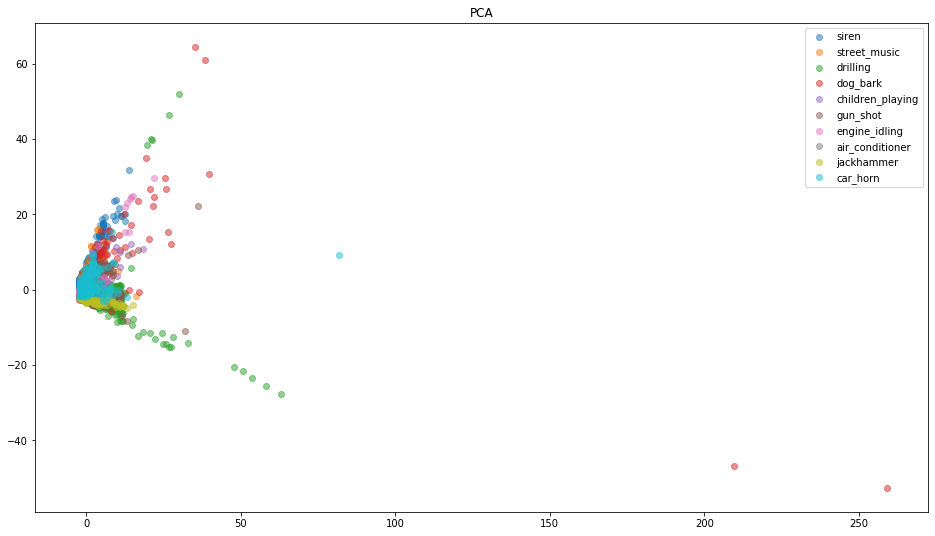

In [71]:
plt.figure(figsize=(16,9))

for i in jedinstvene_klase:
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=.5, label=i)
plt.legend()
plt.title('PCA')

Text(0.5, 1.0, 'LDA')

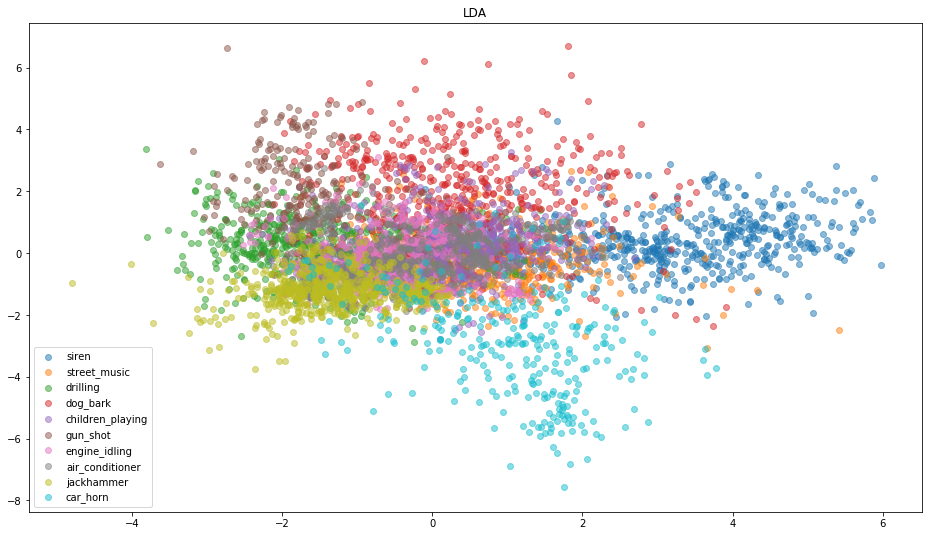

In [72]:
plt.figure(figsize=(16,9))

for i in jedinstvene_klase:
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.5, label=i)
plt.legend()
plt.title('LDA')

In [73]:
s = StandardScaler()
s.fit(X_train)
X_train_std = s.transform(X_train)
X_test_std = s.transform(X_test)

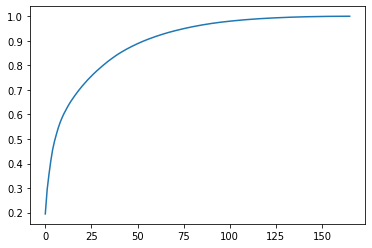

In [74]:
pca = PCA(n_components=None)
pca.fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [75]:
pca = PCA(n_components=0.9)
pca.fit(X_train_std)
X_train_r = pca.transform(X_train_std)
X_test_r = pca.transform(X_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_ ,'\n')

start = time.time()

knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)
c2 = confusion_matrix(y_test, y_pred2)
print(c2)
print("\nUdeo ispravno pogodjenih PCA: ", np.trace(c2)/sum(sum(c2)))

end = time.time()
print('Vreme trajanja je: ',end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  55 

[[118   0   0   0   1   0   0   0   0   1]
 [  0  53   3   1   1   1   0   1   1   0]
 [  0   0 118   1   0   0   0   0   1   0]
 [  0   2  12  97   3   0   0   1   1   4]
 [  0   0   3   1 115   0   1   0   0   0]
 [  1   1   0   0   0 119   2   0   0   2]
 [  0   0   0   1   0   0  44   0   0   1]
 [  0   0   0   0   0   0   0 134   0   0]
 [  0   0   3   2   0   0   0   0 113   3]
 [  1   0  11   2   0   2   0   1   2 101]]

Udeo ispravno pogodjenih PCA:  0.9310027598896045
Vreme trajanja je:  0.26406073570251465  sekundi.


In [76]:
lda = LinearDiscriminantAnalysis(n_components=9)
lda.fit(X_train_std, y_train)
X_train_r = lda.transform(X_train_std)
X_test_r = lda.transform(X_test_std)

start = time.time()

knn3 = KNeighborsClassifier(n_neighbors=1)
knn3.fit(X_train_r, y_train)
y_pred3 = knn3.predict(X_test_r)
c3 = confusion_matrix(y_test, y_pred3)
print(c3)
print("\nUdeo ispravno pogodjenih LDA: ", np.trace(c3)/sum(sum(c2)))

end = time.time()
print('Vreme trajanja je: ',end - start, ' sekundi.')

[[115   1   0   0   1   1   0   0   1   1]
 [  0  53   2   1   1   1   0   1   0   2]
 [  1   0  98   4   3   3   1   2   1   7]
 [  1   4  12  85   5   2   4   0   3   4]
 [  1   1   4   5 100   0   1   4   2   2]
 [  1   0   0   2   0 116   2   0   1   3]
 [  0   0   0   4   0   0  42   0   0   0]
 [  1   0   1   0   0   3   1 128   0   0]
 [  1   0   1   3   0   2   0   0 112   2]
 [  3   2  12   7   1   0   0   1   6  88]]

Udeo ispravno pogodjenih LDA:  0.8620055197792088
Vreme trajanja je:  0.09402060508728027  sekundi.


In [77]:
#NA STVARNIM NAJBOLJIM PARAMETRIMA sa PCA pa LDA

In [78]:
#KNN
pca_KNN = PCA(n_components=0.95)
pca_KNN.fit(X_train_std)
X_train_r = pca_KNN.transform(X_train_std)
X_test_r = pca_KNN.transform(X_test_std)

start = time.time()

classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')
classifier.fit(X_train_r, y_train)
y_pred = classifier.predict(X_test_r)
conf_mat_KNN = confusion_matrix(y_test, y_pred, labels = unikati)

print('\nTRENING SKUP SA NAJBOLJIM PARAMETROM: k = 1, m = manhattan \n')

c_KNN_PCA = confusion_matrix(y_test, y_pred)
print(c_KNN_PCA)
print("\nUdeo ispravno pogodjenih PCA: ", np.trace(c_KNN_PCA)/sum(sum(c_KNN_PCA)))

print('\nProcenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('Preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('Preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('Osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('Osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))
print('************************************************')

end = time.time()

vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')

MERE_USPESNOSTI_pca_KNN = pd.DataFrame(columns = ['klasifikator','preciznost','tačnost','prosečna tačnost',
                                       'osetljivost','prosečna osetljivost','F mera'])

data = {'klasifikator':'KNN sa PCA',
        'preciznost': precision_score(y_test, y_pred, average='micro'),
        'tačnost': accuracy_score(y_test, y_pred),
        'prosečna tačnost': tacnost_po_klasi(c_KNN_PCA, y.unique()),
        'osetljivost': recall_score(y_test, y_pred, average='micro'),
        'prosečna osetljivost': osetljivost_po_klasi(c_KNN_PCA, y.unique()),
        'F mera': f1_score(y_test, y_pred, average='micro')}

MERE_USPESNOSTI_pca_KNN = MERE_USPESNOSTI_pca_KNN.append(data,ignore_index = True)
MERE_USPESNOSTI_pca_KNN.head()


TRENING SKUP SA NAJBOLJIM PARAMETROM: k = 1, m = manhattan 

[[119   0   0   0   0   0   0   0   0   1]
 [  0  53   1   1   1   2   0   1   1   1]
 [  0   0 118   1   1   0   0   0   0   0]
 [  0   1   9 104   3   1   0   0   0   2]
 [  0   0   3   1 116   0   0   0   0   0]
 [  1   1   1   0   0 118   2   0   0   2]
 [  0   0   0   1   1   0  44   0   0   0]
 [  0   0   0   0   0   0   0 134   0   0]
 [  0   0   4   3   0   0   0   0 113   1]
 [  0   1   6   2   0   0   0   2   2 107]]

Udeo ispravno pogodjenih PCA:  0.9438822447102115

Procenat pogodjenih uzoraka:  0.9438822447102115
Preciznost mikro:  0.9438822447102115
Preciznost makro:  0.9462819770764487
Osetljivost mikro:  0.9438822447102115
Osetljivost makro:  0.940325849566749
f mera mikro:  0.9438822447102115
f mera makro:  0.942271211438503
************************************************
Vreme trajanja je:  0:00:00
Vreme trajanja je:  0.7551825046539307
************************************************
Za klasu  siren  tacn

,klasifikator,preciznost,tačnost,prosečna tačnost,osetljivost,prosečna osetljivost,F mera
0,KNN sa PCA,0.943882,0.943882,0.988776,0.943882,0.940326,0.943882


In [90]:
lda_KNN = LinearDiscriminantAnalysis(n_components=9)
lda_KNN.fit(X_train_std, y_train)
X_train_r = lda_KNN.transform(X_train_std)
X_test_r = lda_KNN.transform(X_test_std)

start = time.time()

classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')
classifier.fit(X_train_r, y_train)
y_pred = classifier.predict(X_test_r)
conf_mat_KNN = confusion_matrix(y_test, y_pred, labels = unikati)

print('\nTRENING SKUP SA NAJBOLJIM PARAMETROM: k = 1, m = manhattan \n')

c_KNN_LDA = confusion_matrix(y_test, y_pred)
print(c_KNN_LDA)
print("\nUdeo ispravno pogodjenih LDA: ", np.trace(c_KNN_LDA)/sum(sum(c_KNN_LDA)))

print('\nProcenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('Preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('Preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('Osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('Osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))
print('************************************************')

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')


MERE_USPESNOSTI_lda_KNN = pd.DataFrame(columns = ['klasifikator','preciznost','tačnost','prosečna tačnost',
                                       'osetljivost','prosečna osetljivost','F mera'])

data = {'klasifikator':'KNN sa LDA',
        'preciznost': precision_score(y_test, y_pred, average='micro'),
        'tačnost': accuracy_score(y_test, y_pred),
        'prosečna tačnost': tacnost_po_klasi(c_KNN_LDA, y.unique()),
        'osetljivost': recall_score(y_test, y_pred, average='micro'),
        'prosečna osetljivost': osetljivost_po_klasi(c_KNN_LDA, y.unique()),
        'F mera': f1_score(y_test, y_pred, average='micro')}

MERE_USPESNOSTI_lda_KNN = MERE_USPESNOSTI_lda_KNN.append(data,ignore_index = True)
MERE_USPESNOSTI_lda_KNN.head()


TRENING SKUP SA NAJBOLJIM PARAMETROM: k = 1, m = manhattan 

[[114   1   0   1   2   0   0   0   1   1]
 [  0  53   2   1   1   1   0   1   0   2]
 [  2   1  99   2   5   2   1   1   2   5]
 [  0   2  14  86   6   2   4   1   3   2]
 [  0   1   4   6  93   2   3   6   2   3]
 [  0   0   1   1   0 116   3   0   1   3]
 [  0   0   0   1   0   1  44   0   0   0]
 [  1   0   0   0   0   2   0 130   0   1]
 [  1   0   3   3   0   2   0   1 108   3]
 [  3   3  11   8   1   0   0   2   6  86]]

Udeo ispravno pogodjenih LDA:  0.8546458141674333

Procenat pogodjenih uzoraka:  0.8546458141674333
Preciznost mikro:  0.8546458141674333
Preciznost makro:  0.8511021619246675
Osetljivost mikro:  0.8546458141674333
Osetljivost makro:  0.8599418768682578
f mera mikro:  0.8546458141674332
f mera makro:  0.8537939296291744
************************************************
Vreme trajanja je:  0:00:00
Vreme trajanja je:  0.20104575157165527
************************************************
Za klasu  siren  t

,klasifikator,preciznost,tačnost,prosečna tačnost,osetljivost,prosečna osetljivost,F mera
0,KNN sa LDA,0.854646,0.854646,0.970929,0.854646,0.859942,0.854646


In [80]:
#SVM
pca_SVM = PCA(n_components=0.9)
pca_SVM.fit(X_train_std)
X_train_r = pca_SVM.transform(X_train_std)
X_test_r = pca_SVM.transform(X_test_std)

start = time.time()

classifier = SVC(C=1, kernel='poly', decision_function_shape='ovo')
classifier.fit(X_train_r, y_train)
y_pred = classifier.predict(X_test_r)
SVM_conf_mat = confusion_matrix(y_test,y_pred,labels = unikati)

print('\nTRENING SKUP SA NAJBOLJIM PARAMETROM: C = 1,kernel = poly, pristup:OVO ')

c_SVM_PCA = confusion_matrix(y_test, y_pred)
print(c_SVM_PCA)
print("\nUdeo ispravno pogodjenih PCA: ", np.trace(c_SVM_PCA)/sum(sum(c_SVM_PCA)))

print('\nProcenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('Preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('Preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('Osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('Osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))
print('************************************************')

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')


MERE_USPESNOSTI_pca_SVM  = pd.DataFrame(columns = ['klasifikator','preciznost','tačnost','prosečna tačnost',
                                       'osetljivost','prosečna osetljivost','F mera'])

data = {'klasifikator':'SVM sa PCA',
        'preciznost': precision_score(y_test, y_pred, average='micro'),
        'tačnost': accuracy_score(y_test, y_pred),
        'prosečna tačnost': tacnost_po_klasi(c_SVM_PCA, y.unique()),
        'osetljivost': recall_score(y_test, y_pred, average='micro'),
        'prosečna osetljivost': osetljivost_po_klasi(c_SVM_PCA, y.unique()),
        'F mera': f1_score(y_test, y_pred, average='micro')}

MERE_USPESNOSTI_pca_SVM = MERE_USPESNOSTI_pca_SVM.append(data,ignore_index = True)
MERE_USPESNOSTI_pca_SVM.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



TRENING SKUP SA NAJBOLJIM PARAMETROM: C = 1,kernel = poly, pristup:OVO 
[[ 91   0  19   0   0   0   0   8   1   1]
 [  0  41  11   0   0   0   0   7   0   2]
 [  4   0 110   1   2   1   0   1   0   1]
 [  4   3  38  68   2   0   1   2   1   1]
 [  3   0  25   5  72   1   4   8   0   2]
 [  8   0  19   1   0  82   4   9   0   2]
 [  1   0   4   0   2   0  38   1   0   0]
 [  2   0   7   0   0   0   0 125   0   0]
 [  4   0  25   2   1   1   0   0  84   4]
 [  3   1  63   0   0   1   0   1   3  48]]

Udeo ispravno pogodjenih PCA:  0.6982520699172033

Procenat pogodjenih uzoraka:  0.6982520699172033
Preciznost mikro:  0.6982520699172033
Preciznost makro:  0.8070942279633716
Osetljivost mikro:  0.6982520699172033
Osetljivost makro:  0.702293546765797
f mera mikro:  0.6982520699172033
f mera makro:  0.7214194693382617
************************************************
Vreme trajanja je:  0:00:01
Vreme trajanja je:  1.3693222999572754
************************************************
Za klasu 

,klasifikator,preciznost,tačnost,prosečna tačnost,osetljivost,prosečna osetljivost,F mera
0,SVM sa PCA,0.698252,0.698252,0.93965,0.698252,0.702294,0.698252


In [81]:
lda_SVM  = LinearDiscriminantAnalysis(n_components=9)
lda_SVM .fit(X_train_std, y_train)
X_train_r = lda_SVM .transform(X_train_std)
X_test_r = lda_SVM .transform(X_test_std)

start = time.time()

classifier = SVC(C=1, kernel='poly', decision_function_shape='ovo')
classifier.fit(X_train_r, y_train)
y_pred = classifier.predict(X_test_r)
SVM_conf_mat = confusion_matrix(y_test,y_pred,labels = unikati)

print('\nTRENING SKUP SA NAJBOLJIM PARAMETROM: C = 1,kernel = poly, pristup:OVO')

c_SVM_LDA = confusion_matrix(y_test, y_pred)
print(c_SVM_LDA)
print("\nUdeo ispravno pogodjenih LDA: ", np.trace(c_SVM_LDA)/sum(sum(c_SVM_LDA)))

print('\nProcenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('Preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('Preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('Osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('Osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))
print('************************************************')

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')


MERE_USPESNOSTI_lda_SVM = pd.DataFrame(columns = ['klasifikator','preciznost','tačnost','prosečna tačnost',
                                       'osetljivost','prosečna osetljivost','F mera'])

data = {'klasifikator':'SVM sa LDA',
        'preciznost': precision_score(y_test, y_pred, average='micro'),
        'tačnost': accuracy_score(y_test, y_pred),
        'prosečna tačnost': tacnost_po_klasi(c_SVM_LDA, y.unique()),
        'osetljivost': recall_score(y_test, y_pred, average='micro'),
        'prosečna osetljivost': osetljivost_po_klasi(c_SVM_LDA, y.unique()),
        'F mera': f1_score(y_test, y_pred, average='micro')}

MERE_USPESNOSTI_lda_SVM  = MERE_USPESNOSTI_lda_SVM.append(data,ignore_index = True)
MERE_USPESNOSTI_lda_SVM.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



TRENING SKUP SA NAJBOLJIM PARAMETROM: C = 1,kernel = poly, pristup:OVO
[[102   0   2   0   0   8   0   7   0   1]
 [  1  49   3   3   1   2   0   1   0   1]
 [  3   0 104   4   3   0   0   0   1   5]
 [  3   2  27  65   7   5   5   0   4   2]
 [  0   1  17   4  84   3   1   5   1   4]
 [  4   0   8   3   1  97   3   7   0   2]
 [  0   0   0   3   1   2  40   0   0   0]
 [  1   0   5   0   1   5   1 118   0   3]
 [  0   1  11   2   0   3   0   0 102   2]
 [  3   1  35   2   1   2   1   1   4  70]]

Udeo ispravno pogodjenih LDA:  0.764489420423183

Procenat pogodjenih uzoraka:  0.764489420423183
Preciznost mikro:  0.764489420423183
Preciznost makro:  0.7959573298762016
Osetljivost mikro:  0.764489420423183
Osetljivost makro:  0.7714082794119503
f mera mikro:  0.764489420423183
f mera makro:  0.7738886229351765
************************************************
Vreme trajanja je:  0:00:00
Vreme trajanja je:  0.4941134452819824
************************************************
Za klasu  sire

,klasifikator,preciznost,tačnost,prosečna tačnost,osetljivost,prosečna osetljivost,F mera
0,SVM sa LDA,0.764489,0.764489,0.952898,0.764489,0.771408,0.764489


In [94]:
#LOGISTICKA REGRESIJA
pca_Log = PCA(n_components=0.9)
pca_Log.fit(X_train_std)
X_train_r = pca_Log.transform(X_train_std)
X_test_r = pca_Log.transform(X_test_std)

start = time.time()

classifier = LogisticRegression(max_iter=200, solver='newton-cg')
classifier.fit(X_train_r, y_train)
y_pred = classifier.predict(X_test_r) 
Log_conf_mat = confusion_matrix(y_test, y_pred, labels = unikati)

print('\nTRENING SKUP SA NAJBOLJIM PARAMETROM: C = 100, kernel = newton-cg ')

c_Log_PCA = confusion_matrix(y_test, y_pred)
print(c_Log_PCA)
print("\nUdeo ispravno pogodjenih PCA: ", np.trace(c_Log_PCA)/sum(sum(c_Log_PCA)))

print('\nProcenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('Preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('Preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('Osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('Osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))
print('************************************************')

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')

MERE_USPESNOSTI_pca_Log = pd.DataFrame(columns = ['klasifikator','preciznost','tačnost','prosečna tačnost',
                                       'osetljivost','prosečna osetljivost','F mera'])

data = {'klasifikator':'Logistička regresija sa PCA',
        'preciznost': precision_score(y_test, y_pred, average='micro'),
        'tačnost': accuracy_score(y_test, y_pred),
        'prosečna tačnost': tacnost_po_klasi(c_Log_PCA, y.unique()),
        'osetljivost': recall_score(y_test, y_pred, average='micro'),
        'prosečna osetljivost': osetljivost_po_klasi(c_Log_PCA, y.unique()),
        'F mera': f1_score(y_test, y_pred, average='micro')}

MERE_USPESNOSTI_pca_Log = MERE_USPESNOSTI_pca_Log.append(data,ignore_index = True)
MERE_USPESNOSTI_pca_Log.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



TRENING SKUP SA NAJBOLJIM PARAMETROM: C = 100, kernel = newton-cg 
[[ 85   0   4   0   4   3   0  11   7   6]
 [  3  43   2   0   3   0   0   5   2   3]
 [  6   0  83  11   5   2   0   3   1   9]
 [  8   2  10  74   9   3   1   3   7   3]
 [  2   0   6   3  85  13   0   6   0   5]
 [ 25   0   4   5  10  56   1  14   2   8]
 [  0   0   0   2   2   4  38   0   0   0]
 [  3   0   1   0   4   9   0 115   0   2]
 [  5   0   3   4   0   4   0   2  95   8]
 [  7   1  31   3   1   4   1   3   8  61]]

Udeo ispravno pogodjenih PCA:  0.6761729530818767

Procenat pogodjenih uzoraka:  0.6761729530818767
Preciznost mikro:  0.6761729530818767
Preciznost makro:  0.7085771670483532
Osetljivost mikro:  0.6761729530818767
Osetljivost makro:  0.6855671244807988
f mera mikro:  0.6761729530818767
f mera makro:  0.6919668358738852
************************************************
Vreme trajanja je:  0:00:02
Vreme trajanja je:  2.0784709453582764
************************************************
Za klasu  sir

,klasifikator,preciznost,tačnost,prosečna tačnost,osetljivost,prosečna osetljivost,F mera
0,Logistička regresija sa PCA,0.676173,0.676173,0.935235,0.676173,0.685567,0.676173


In [95]:
lda_Log = LinearDiscriminantAnalysis(n_components=9)
lda_Log.fit(X_train_std, y_train)
X_train_r = lda_Log.transform(X_train_std)
X_test_r = lda_Log.transform(X_test_std)

start = time.time()

classifier = LogisticRegression(max_iter=100, solver='newton-cg')
classifier.fit(X_train_r, y_train)
y_pred = classifier.predict(X_test_r) 
Log_conf_mat = confusion_matrix(y_test, y_pred, labels = unikati)

print('\nTRENING SKUP SA NAJBOLJIM PARAMETROM: C = 100, kernel = newton-cg ')

c_Log_LDA = confusion_matrix(y_test, y_pred)
print(c_Log_LDA)
print("\nUdeo ispravno pogodjenih LDA: ", np.trace(c_Log_LDA)/sum(sum(c_Log_LDA)))

print('\nProcenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('Preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('Preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('Osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('Osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))
print('************************************************')

end = time.time()
vreme = (end - start)
print('Vreme trajanja je: ',konvertovanje(vreme))
print('Vreme trajanja je: ',vreme)
print('************************************************')


MERE_USPESNOSTI_lda_Log = pd.DataFrame(columns = ['klasifikator','preciznost','tačnost','prosečna tačnost',
                                       'osetljivost','prosečna osetljivost','F mera'])

data = {'klasifikator':'Logisticka regresija sa LDA',
        'preciznost': precision_score(y_test, y_pred, average='micro'),
        'tačnost': accuracy_score(y_test, y_pred),
        'prosečna tačnost': tacnost_po_klasi(c_Log_LDA, y.unique()),
        'osetljivost': recall_score(y_test, y_pred, average='micro'),
        'prosečna osetljivost': osetljivost_po_klasi(c_Log_LDA, y.unique()),
        'F mera': f1_score(y_test, y_pred, average='micro')}

MERE_USPESNOSTI_lda_Log = MERE_USPESNOSTI_lda_Log.append(data,ignore_index = True)
MERE_USPESNOSTI_lda_Log.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



TRENING SKUP SA NAJBOLJIM PARAMETROM: C = 100, kernel = newton-cg 
[[ 86   0   0   2   3   6   0  11   2  10]
 [  2  44   3   0   2   1   0   3   0   6]
 [  7   2  72  13   4   5   0   2   2  13]
 [  6   4  13  69  10   2   5   4   5   2]
 [  0   3  11   4  82   4   0  10   0   6]
 [ 28   0   3   5   1  59   3  14   6   6]
 [  0   0   0   6   2   1  37   0   0   0]
 [  2   0   3   0   4   8   0 115   0   2]
 [  3   0   5   3   0   6   0   0  97   7]
 [  8   1  18   2   3   4   1   3   6  74]]

Udeo ispravno pogodjenih LDA:  0.6761729530818767

Procenat pogodjenih uzoraka:  0.6761729530818767
Preciznost mikro:  0.6761729530818767
Preciznost makro:  0.6923292083068832
Osetljivost mikro:  0.6761729530818767
Osetljivost makro:  0.6849187815949322
f mera mikro:  0.6761729530818767
f mera makro:  0.6857032242870534
************************************************
Vreme trajanja je:  0:00:00
Vreme trajanja je:  0.2970707416534424
************************************************
Za klasu  sir

,klasifikator,preciznost,tačnost,prosečna tačnost,osetljivost,prosečna osetljivost,F mera
0,Logisticka regresija sa LDA,0.676173,0.676173,0.935235,0.676173,0.684919,0.676173


In [96]:
#PRIKAZ REZULTATA

In [97]:
MERE_USPESNOSTI_REDUKOVANE_PCA = MERE_USPESNOSTI_pca_KNN.append([MERE_USPESNOSTI_pca_SVM,MERE_USPESNOSTI_pca_Log])
MERE_USPESNOSTI_REDUKOVANE_PCA.head()

,klasifikator,preciznost,tačnost,prosečna tačnost,osetljivost,prosečna osetljivost,F mera
0,KNN sa PCA,0.943882,0.943882,0.988776,0.943882,0.940326,0.943882
0,SVM sa PCA,0.698252,0.698252,0.939650,0.698252,0.702294,0.698252
0,Logistička regresija sa PCA,0.676173,0.676173,0.935235,0.676173,0.685567,0.676173


In [98]:
MERE_USPESNOSTI_REDUKOVANE_LDA = MERE_USPESNOSTI_lda_KNN.append([MERE_USPESNOSTI_lda_SVM,MERE_USPESNOSTI_lda_Log])
MERE_USPESNOSTI_REDUKOVANE_LDA.head()

,klasifikator,preciznost,tačnost,prosečna tačnost,osetljivost,prosečna osetljivost,F mera
0,KNN sa LDA,0.854646,0.854646,0.970929,0.854646,0.859942,0.854646
0,SVM sa LDA,0.764489,0.764489,0.952898,0.764489,0.771408,0.764489
0,Logisticka regresija sa LDA,0.676173,0.676173,0.935235,0.676173,0.684919,0.676173


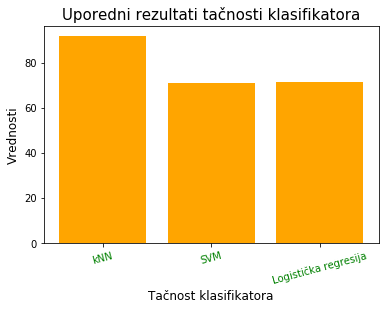

In [87]:
x_osa = ['kNN','SVM','Logistička regresija']
no_movies = [100*0.916,100*0.709,100*0.713]   


index = np.arange(len(x_osa))
plt.bar(index, no_movies, color = 'orange')
plt.xlabel('Tačnost klasifikatora', fontsize=12)
plt.ylabel('Vrednosti', fontsize=12)
plt.xticks(index, x_osa, color = 'green', fontsize=10, rotation=15)
plt.title('Uporedni rezultati tačnosti klasifikatora',fontsize=15)
#plt.grid()
plt.show()
    

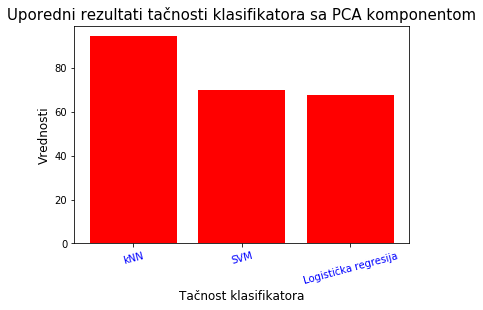

In [88]:
x_osa_redukovano_PCA = ['kNN','SVM','Logistička regresija']
no_movies_redukovano_PCA = [100*0.943,100*0.698,100*0.676]  


index_redukovano_PCA = np.arange(len(x_osa_redukovano_PCA))
plt.bar(index_redukovano_PCA, no_movies_redukovano_PCA, color = 'red')
plt.xlabel('Tačnost klasifikatora', fontsize=12)
plt.ylabel('Vrednosti', fontsize=12)
plt.xticks(index_redukovano_PCA, x_osa_redukovano_PCA, color = 'blue', fontsize=10, rotation=15)
plt.title('Uporedni rezultati tačnosti klasifikatora sa PCA komponentom',fontsize=15)
#plt.grid()
plt.show()

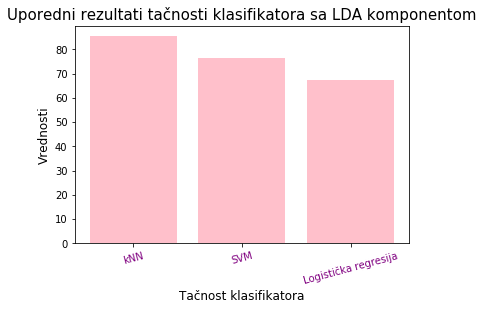

In [89]:
x_osa_redukovano_LDA = ['kNN','SVM','Logistička regresija']
no_movies_redukovano_LDA  = [100*0.854,100*0.764,100*0.676]   


index_redukovano_LDA  = np.arange(len(x_osa_redukovano_LDA ))
plt.bar(index_redukovano_LDA , no_movies_redukovano_LDA , color = 'pink')
plt.xlabel('Tačnost klasifikatora', fontsize=12)
plt.ylabel('Vrednosti', fontsize=12)
plt.xticks(index_redukovano_LDA , x_osa_redukovano_LDA , color = 'purple', fontsize=10, rotation=15)
plt.title('Uporedni rezultati tačnosti klasifikatora sa LDA komponentom',fontsize=15)
#plt.grid()
plt.show()